# Data Project - Stock Market Analysis
# TESSA NEJLA AYVAZOGLU

## Objective
This notebook explores stock market data, focusing on technology giants like Apple, Amazon, Google, and Microsoft. It demonstrates the use of yfinance to retrieve stock information and visualization techniques with Seaborn and Matplotlib. The analysis includes assessing stock risk using historical performance data and predicting future prices using a Linear Regression model.

![Stock Market Reactions to Election](image/unleashing-the-bulls-how-the-stock-market-achieved-unprecedented-record-levels2.jpg)

# Task Breakdown
- Identify reliable market data APIs
- Develop scripts/tools for data ingestion
- Clean and preprocess collected data
- Standardize data formats
- Explore data visualization techniques
- Perform exploratory data analysis (EDA)
- Extract relevant features from raw financial data
- Implement data transformation techniques
- Split the preprocessed data into training, validation, and test sets
- Document data collection and preprocessing procedures

# Step-by-Step Implementation

## 1. Identify reliable market data APIs

##### We'll use the yfinance library, which provides a Pythonic interface to Yahoo Finance, a reliable source for historical market data.

In [44]:

# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

yf.pdr_override()

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Develop scripts/tools for data ingestion
##### We'll create a script to download stock data for Apple, Amazon, Google, and Microsoft.

In [45]:
import pandas as pd
from datetime import datetime

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['JPMorgan', 'Bank of America', 'Wells FargoC', 'Citigroup']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# Download stock data
JPM = yf.download('JPM', start=start, end=end)
BAC = yf.download('BAC', start=start, end=end)
WFC = yf.download('WFC', start=start, end=end)
C   = yf.download('C',   start=start, end=end)

company_list = [JPM, BAC, WFC, C]
company_name = ['JPMorgan', 'Bank of America', 'Wells FargoC', 'Citigroup']
# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start=start, end=end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# 3. Clean and preprocess collected data
##### Add company names and concatenate data into a single DataFrame.

In [48]:
# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Add company name column to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Shuffle the data and get a random sample of the last 10 rows
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(df.tail(10))
# Select the last 10 rows after shuffling
last_10_rows = df.tail(10)
# Print the last 10 rows with company names on the same line
print("Displaying the last 10 rows of the shuffled DataFrame:\n")
for index, row in last_10_rows.iterrows():
    print(f"Company: {row['company_name']}, Date: {row.name}, Open: {row['Open']:.2f}, High: {row['High']:.2f}, "
          f"Low: {row['Low']:.2f}, Close: {row['Close']:.2f}, Adj Close: {row['Adj Close']:.2f}, "
          f"Volume: {row['Volume']}")# Display the last 10 rows of the shuffled dataframe


            Open        High         Low       Close   Adj Close    Volume   
998   171.619995  171.789993  170.100006  170.660004  169.670303   9923600  \
999    36.930000   37.599998   36.880001   37.509998   37.283237  43219500   
1000   53.540001   53.650002   52.990002   53.259998   52.302116  14402200   
1001   46.770000   47.060001   46.220001   46.820000   46.493435  25209900   
1002  142.190002  143.770004  141.850006  143.000000  141.299393   9533100   
1003   28.760000   29.129999   28.760000   28.980000   28.376829  35192000   
1004  174.779999  176.809998  173.699997  175.789993  174.770538   8539300   
1005   34.889999   35.750000   34.750000   35.230000   35.017021  65951400   
1006  163.080002  165.279999  162.389999  165.229996  163.265030  20305900   
1007  155.820007  157.860001  155.820007  156.839996  154.974808   8913000   

         company_name  
998          JPMorgan  
999   Bank of America  
1000        Citigroup  
1001     Wells FargoC  
1002         JPMorgan

# 4. Standardize data formats
##### Ensure all columns have consistent formats and handle missing values.

In [49]:
df = df.reset_index()
df = df.fillna(method='ffill')

# 5. Explore data visualization techniques
##### Visualize the closing price and volume of sales.

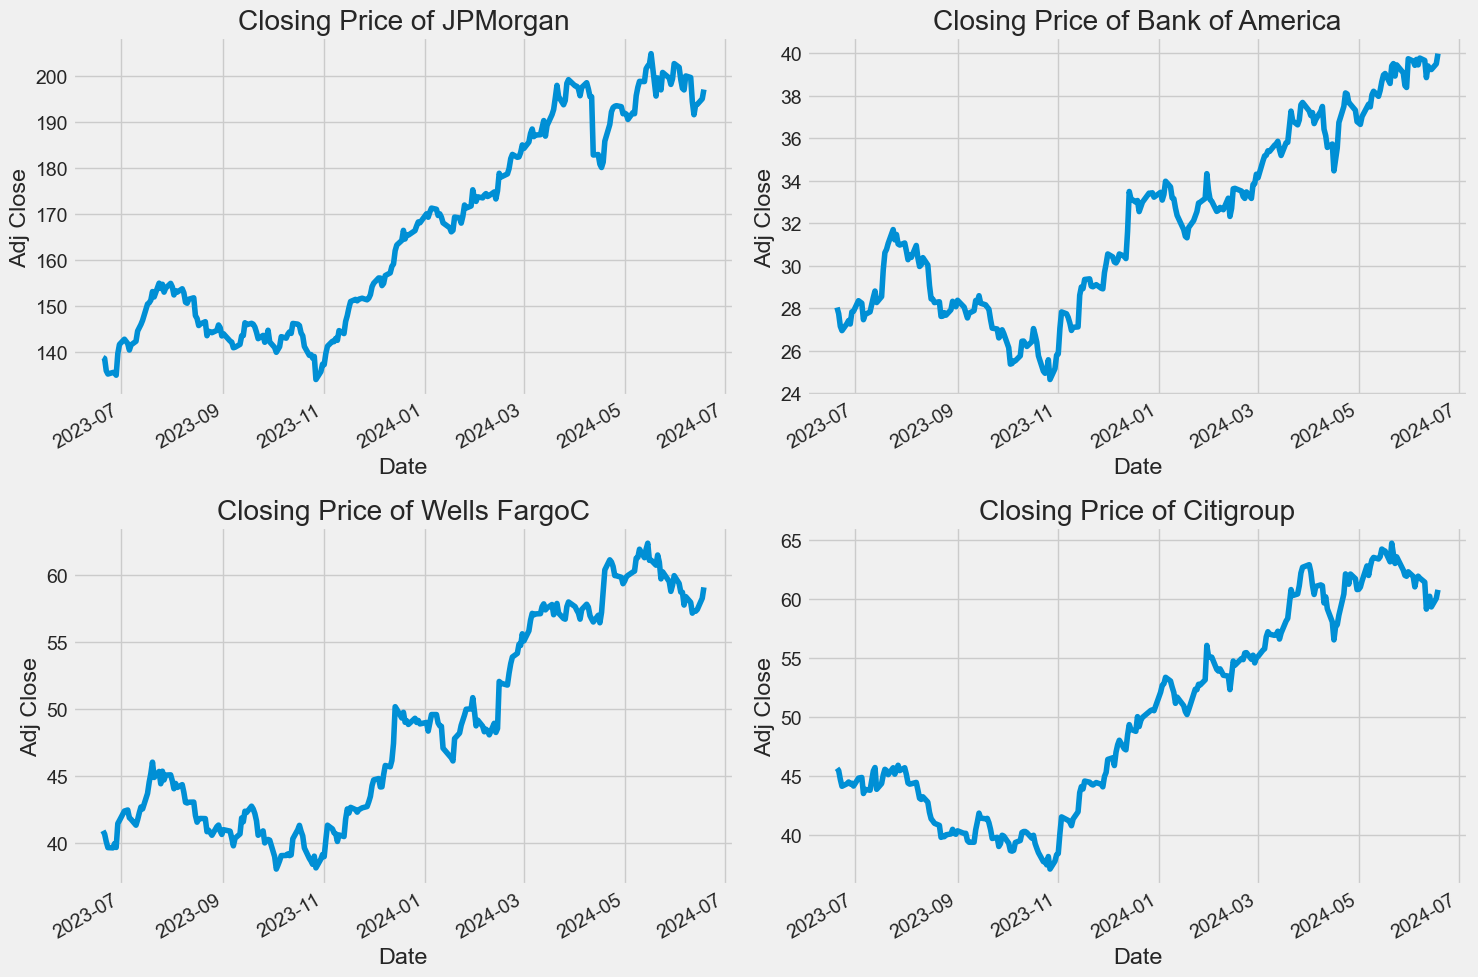

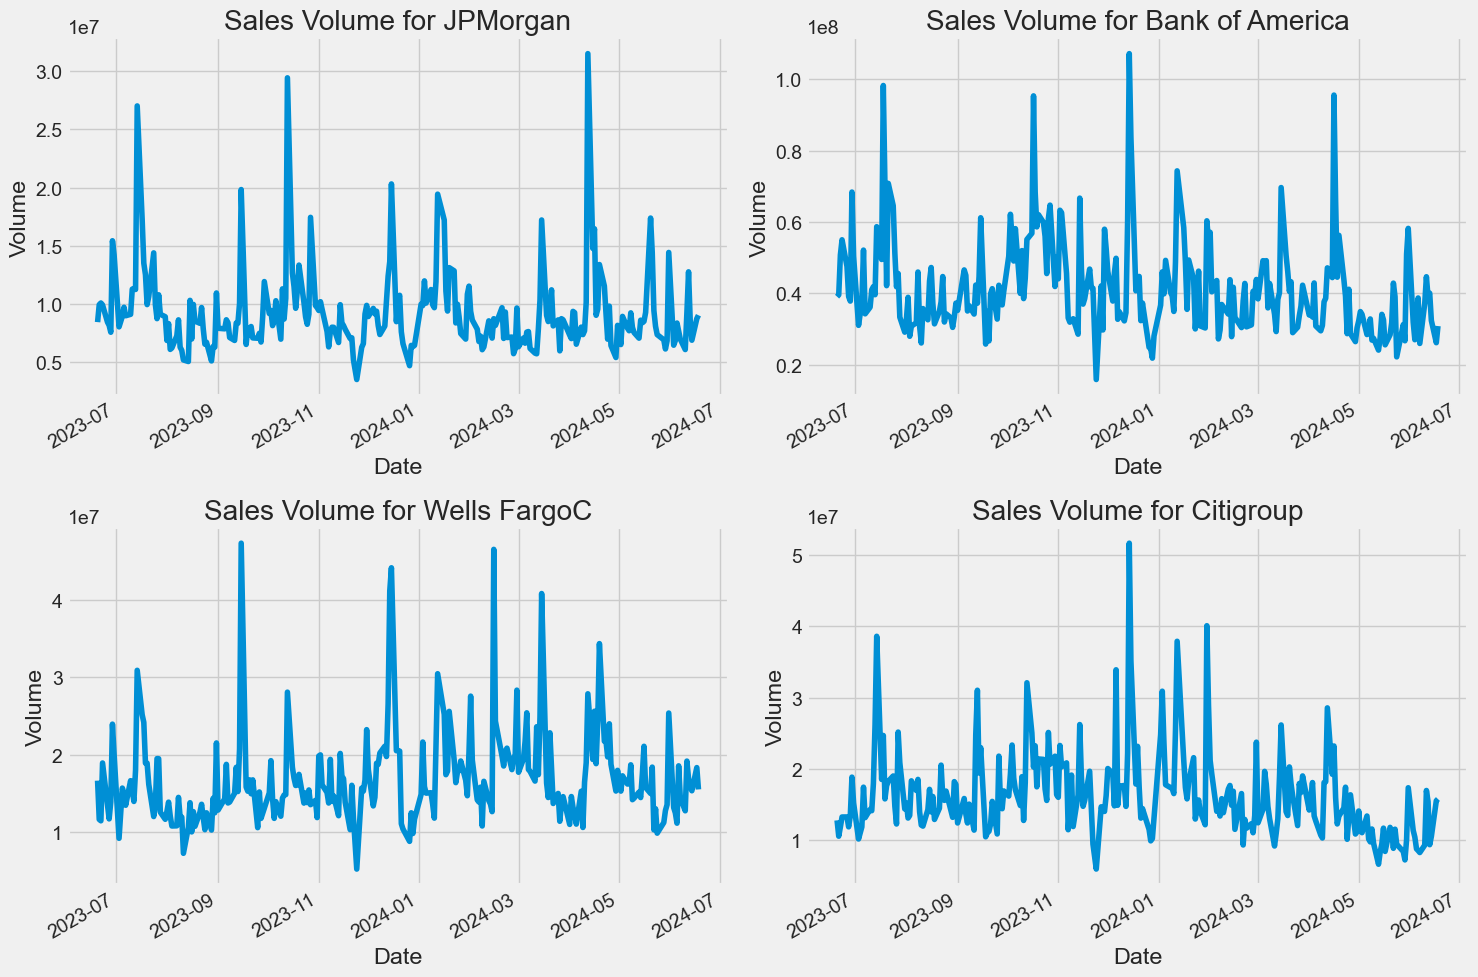

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

# 6. Perform exploratory data analysis (EDA)
##### Calculate and plot moving averages.

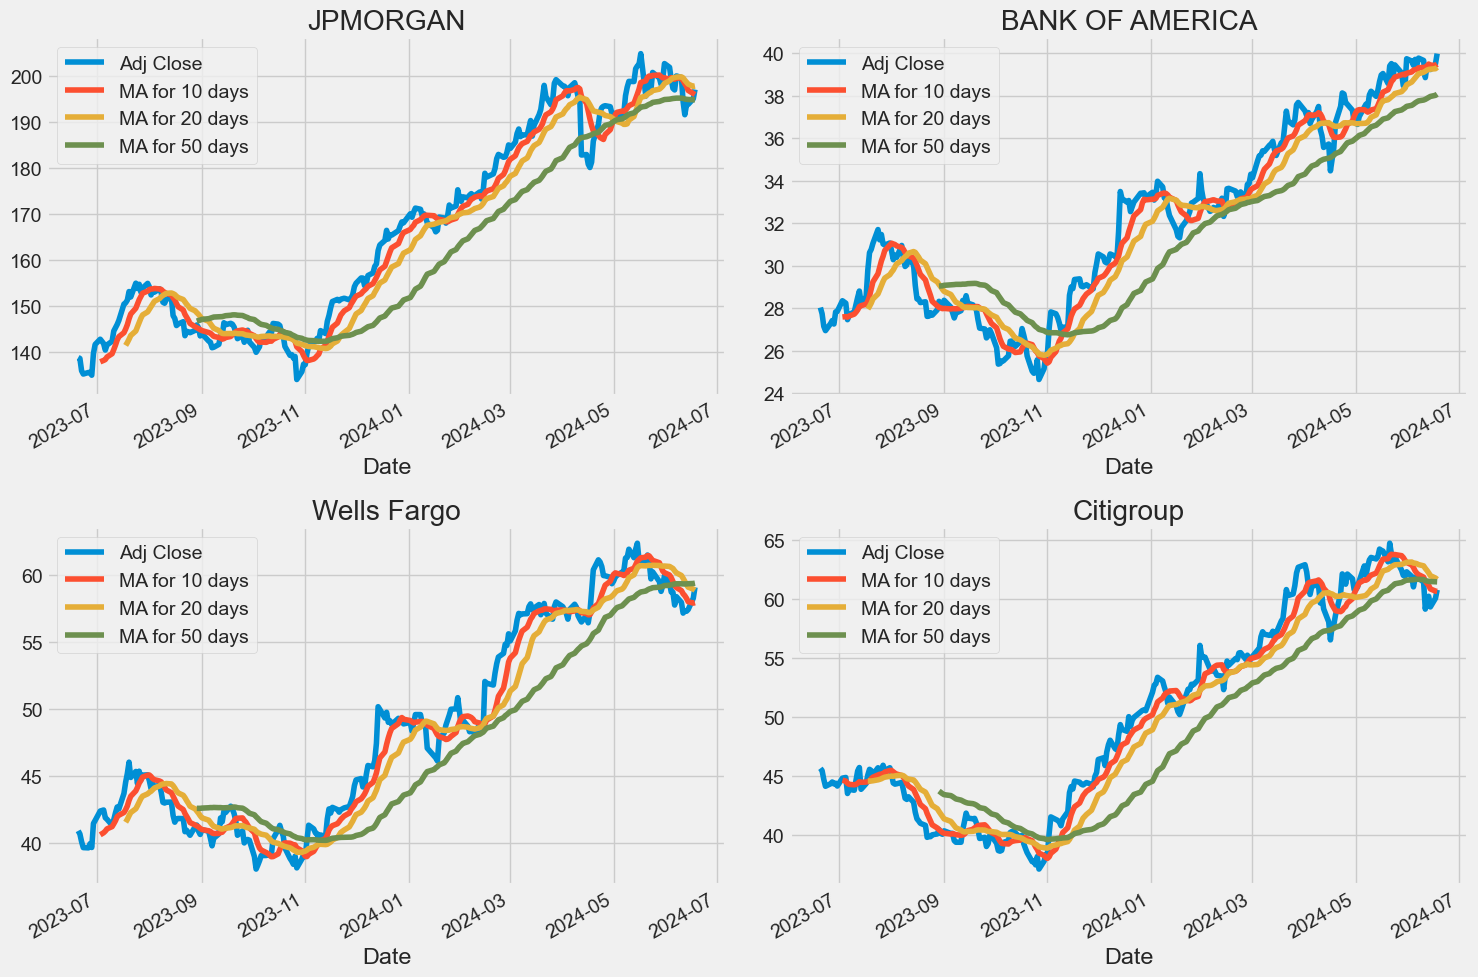

In [51]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('JPMORGAN')
BAC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BANK OF AMERICA')
WFC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Wells Fargo')
C[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Citigroup')
fig.tight_layout()

# 7. Extract relevant features from raw financial data
##### Calculate daily returns and visualize them.

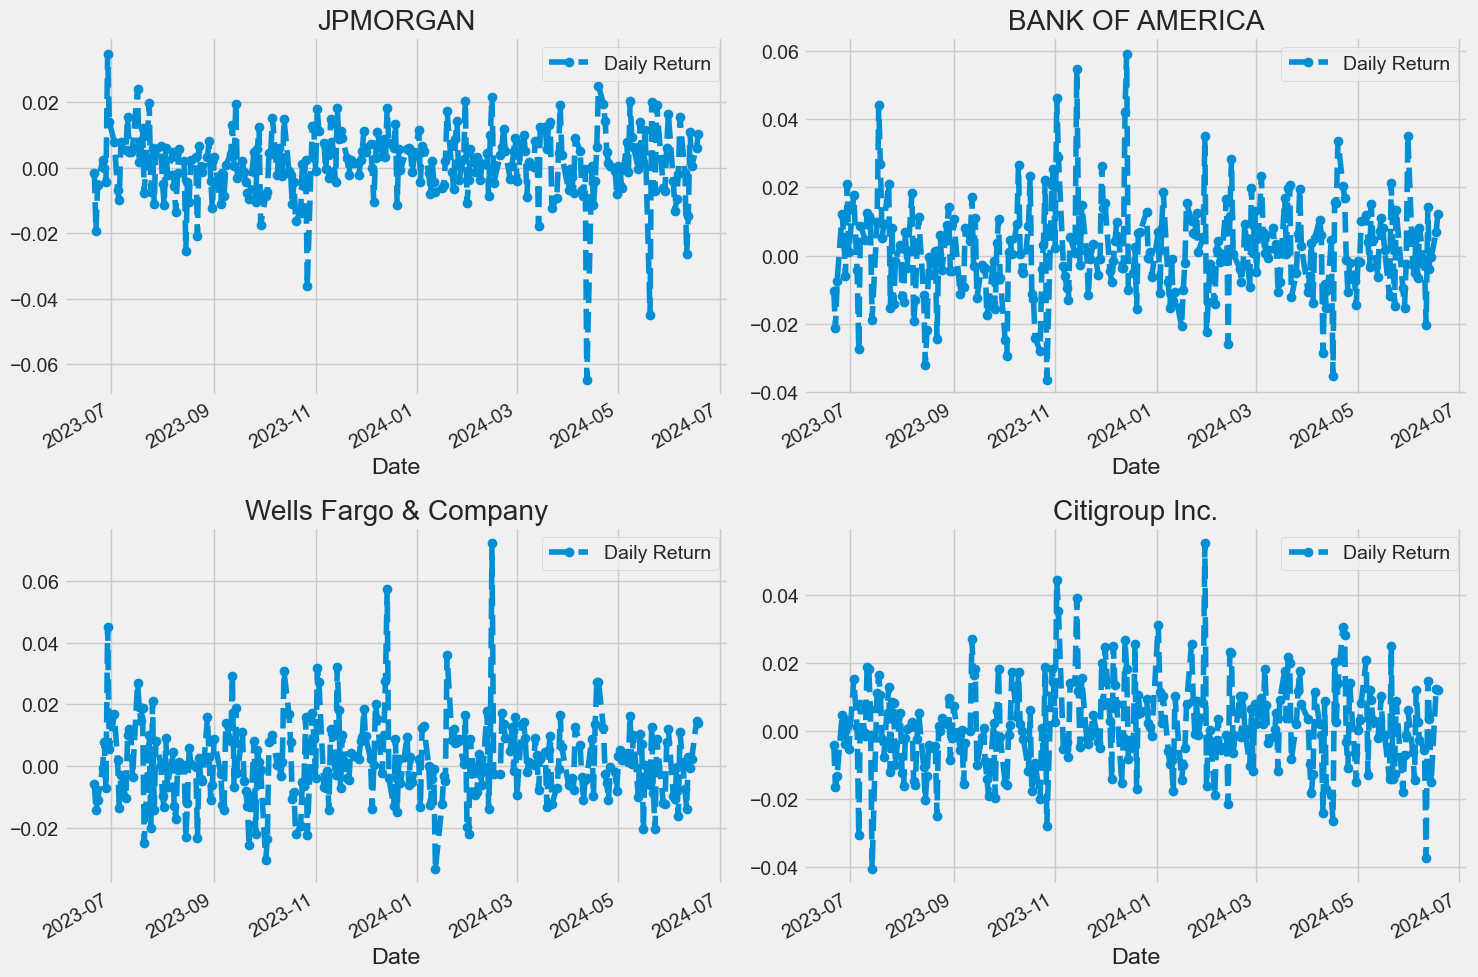

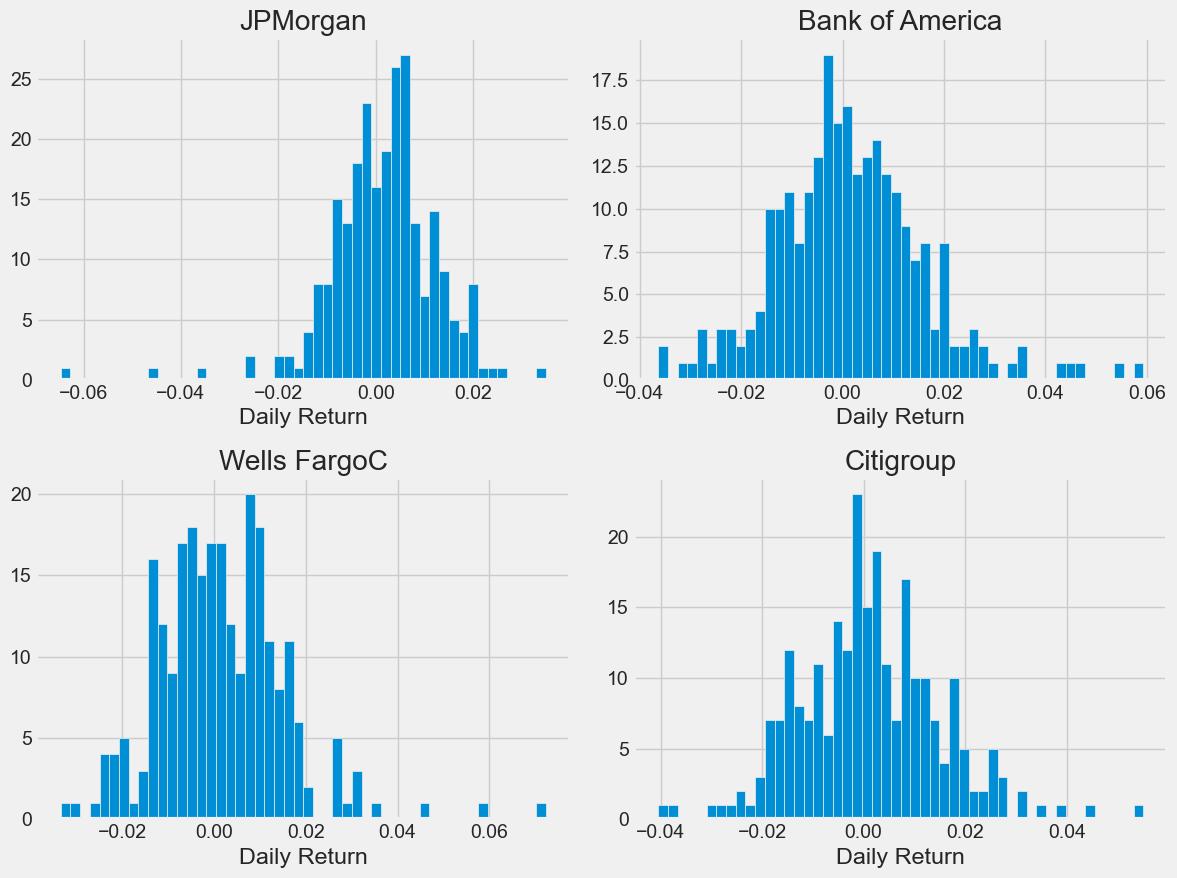

In [52]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('JPMORGAN')
BAC['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BANK OF AMERICA')
WFC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Wells Fargo & Company')
C['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Citigroup Inc.')
fig.tight_layout()

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


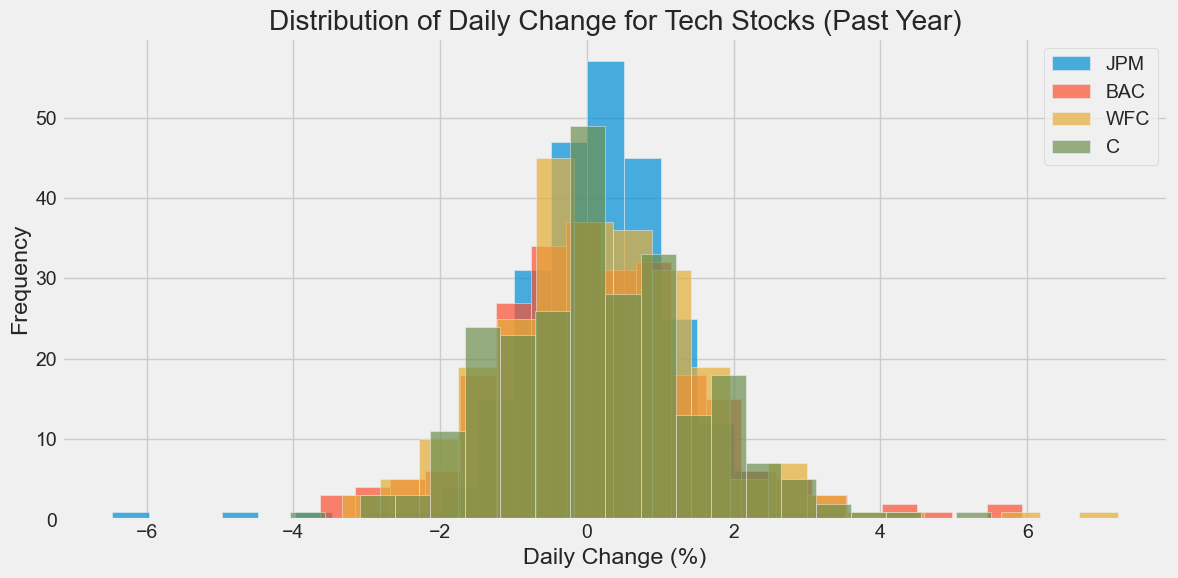

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define company tickers
tech_list = ['JPM', 'BAC', 'WFC', 'C']

# Download stock data for the past year
end = pd.to_datetime('2024-05-27')
start = end - pd.DateOffset(years=1)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Calculate daily percentage change
for company in company_list:
    company['Daily Change'] = company['Adj Close'].pct_change() * 100

# Create histogram (one plot for all companies)
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    # Overlay histograms on the same plot with different transparency levels
    plt.hist(company['Daily Change'], bins=20, alpha=0.7, label=tech_list[i])  
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Change for Tech Stocks (Past Year)')
plt.legend()  # Add legend to identify each company's distribution
plt.tight_layout()

# ... (Rest of the code for identifying best/worst performers and displaying additional info)

plt.show()

# 8. Implement data transformation techniques
##### Calculate correlations and visualize them using heatmaps and pair plots.

[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

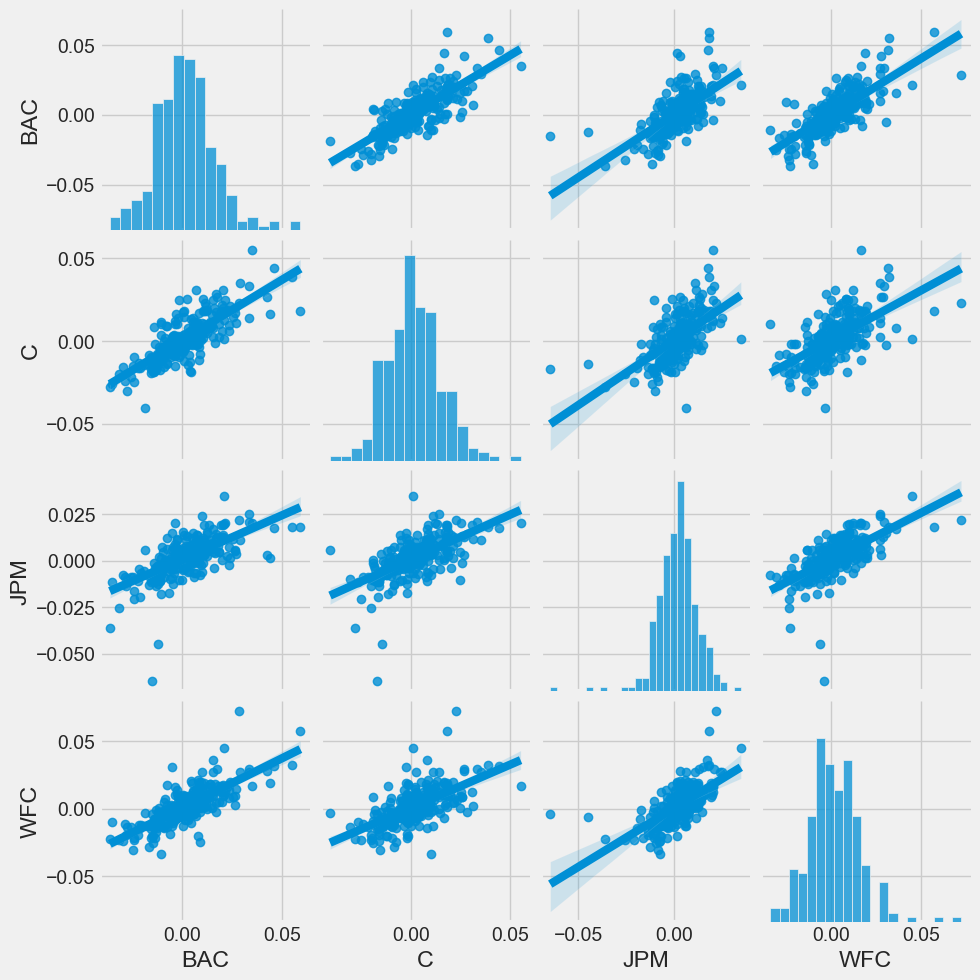

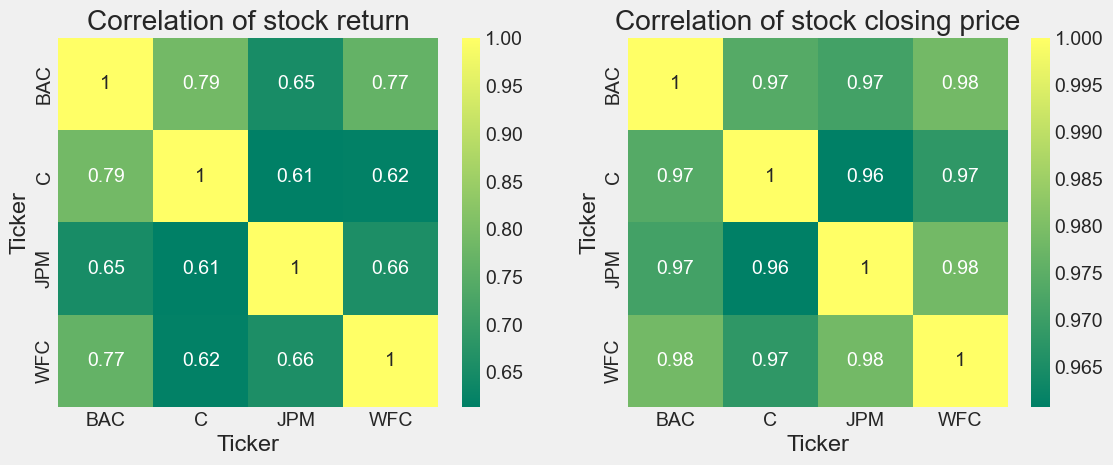

In [55]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.pairplot(tech_rets, kind='reg')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 9. Split the preprocessed data into training, validation, and test sets
##### Split the data for model training and validation.

In [56]:
from sklearn.model_selection import train_test_split

# Drop missing values from both tech_rets and closing_df
tech_rets_cleaned = tech_rets.dropna()
closing_df_cleaned = closing_df.dropna()

# Align the number of rows in tech_rets_cleaned and closing_df_cleaned
min_rows = min(tech_rets_cleaned.shape[0], closing_df_cleaned.shape[0])
tech_rets_cleaned = tech_rets_cleaned[:min_rows]
closing_df_cleaned = closing_df_cleaned[:min_rows]

# Create X and y after handling missing values
X = tech_rets_cleaned.values
y = closing_df_cleaned.values

# Print the shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (249, 4)
Shape of y: (249, 4)


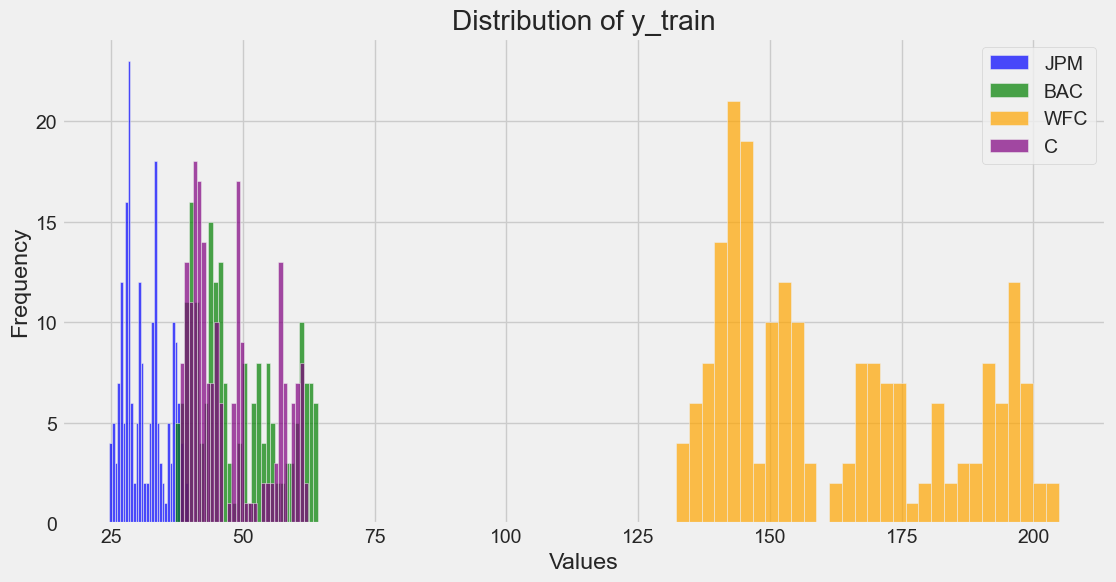

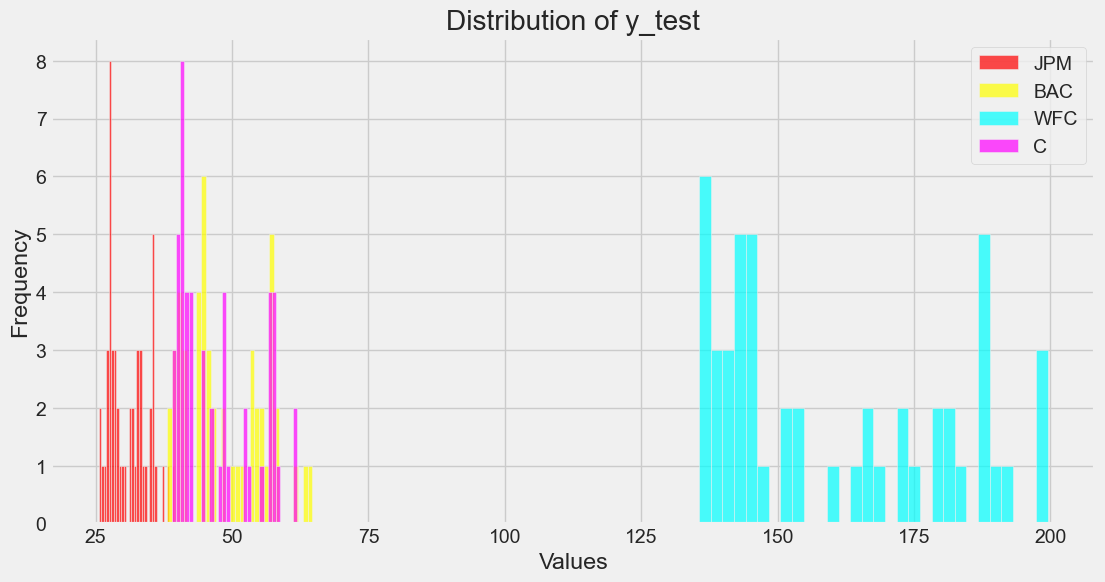

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for the histograms
train_colors = ['blue', 'green', 'orange', 'purple']  # Adjust as needed
test_colors = ['red', 'yellow', 'cyan', 'magenta']    # Adjust as needed

# Plot the distribution of y_train
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_train.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=train_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of y_test
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_test.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=test_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 10. Document data collection and preprocessing procedures
##### Keep thorough documentation of each step for reproducibility.

## Documentation
### Data Collection
- Data sourced from Yahoo Finance using yfinance library.
- Stock symbols: AAPL, GOOG, MSFT, AMZN.
- Time period: Last one year.

### Data Preprocessing
- Filled missing values using forward fill.
- Added company name column.
- Concatenated individual stock data into a single DataFrame.

### Data Standardization
- Ensured consistent date format.
- Handled missing values.

### Data Visualization
- Plotted closing prices and volume of sales.
- Calculated and plotted moving averages (10, 20, 50 days).
- Visualized daily returns using histograms and line plots.

### Feature Extraction
- Calculated daily returns.
- Analyzed correlations between stock returns using heatmaps and pair plots.

### Data Splitting
- Split data into training and test sets for model validation.

## Conclusion

In this notebook, we delved into the world of stock market data analysis. Here's a summary of what we explored:

- We learned how to retrieve stock market data from Yahoo Finance using the yfinance library.
- Using Pandas, Matplotlib, and Seaborn, we visualized time-series data to gain insights into the stock market trends.
- We measured the correlation between different stocks to understand how they move in relation to each other.
- We assessed the risk associated with investing in a particular stock by analyzing its daily returns.
- Lastly, we split the data into training and validation sets for further analysis and model training.

If you have any questions or need further clarification on any topic covered in this notebook, feel free to ask in the comments below. I'll be happy to assist you!

References:
- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- file:///C:/Users/Admin/Desktop/C_AIML/semestert2/AI%20for%20Business/article1.pdf
- https://medium.com/@ethan.duong1120/stock-data-analysis-project-python-1bf2c51b615f
  

# Develop Initian ML Model
###  LSTM (Long Short-Term Memory) model using TensorFlow's Keras API. 

In [71]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your input data arrays
# and y_train, y_test are corresponding target arrays

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Reshape the data for LSTM input
X_train_lstm = np.reshape(X_train_normalized, (X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_lstm = np.reshape(X_test_normalized, (X_test_normalized.shape[0], X_test_normalized.shape[1], 1))

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation split
history = model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)

# Evaluate model performance on test set if needed
# test_loss = model_lstm.evaluate(X_test_lstm, y_test)

# Print predictions or further analysis
print(predictions_lstm)

# Ensure y_train and y_test are reshaped to be one-dimensional if only one target is required
# For example, selecting the first column if it's appropriate
y_train_single = y_train[:, 0]  # Or any other column/aggregation you need
y_test_single = y_test[:, 0]

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_single, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)

# Calculate metrics
mse = mean_squared_error(y_test_single, predictions_lstm)
mae = mean_absolute_error(y_test_single, predictions_lstm)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Epoch 1/100
5/5 [==============================] - 4s 180ms/step - loss: 8143.8276 - val_loss: 8128.0859
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 8129.9253 - val_loss: 8112.0767
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 8112.1118 - val_loss: 8089.6943
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 8085.9512 - val_loss: 8055.0171
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 8044.2656 - val_loss: 7997.8540
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 7974.5967 - val_loss: 7900.4688
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 7855.5166 - val_loss: 7735.8779
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 7658.1421 - val_loss: 7483.6436
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 7375.0718 - val_loss: 7170.9312
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed




Training model for JPM...

Epoch 1/100
4/4 [==============================] - 4s 269ms/step - loss: 0.0649 - val_loss: 0.0599
Epoch 2/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0162 - val_loss: 0.0437
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0165 - val_loss: 0.0088
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0071 - val_loss: 0.0302
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0118 - val_loss: 0.0299
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0059 - val_loss: 0.0112
Epoch 8/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0059 - val_loss: 0.0127
Epoch 9/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0060 - val_loss: 0.0088
Epoch 10/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0053 - val_lo

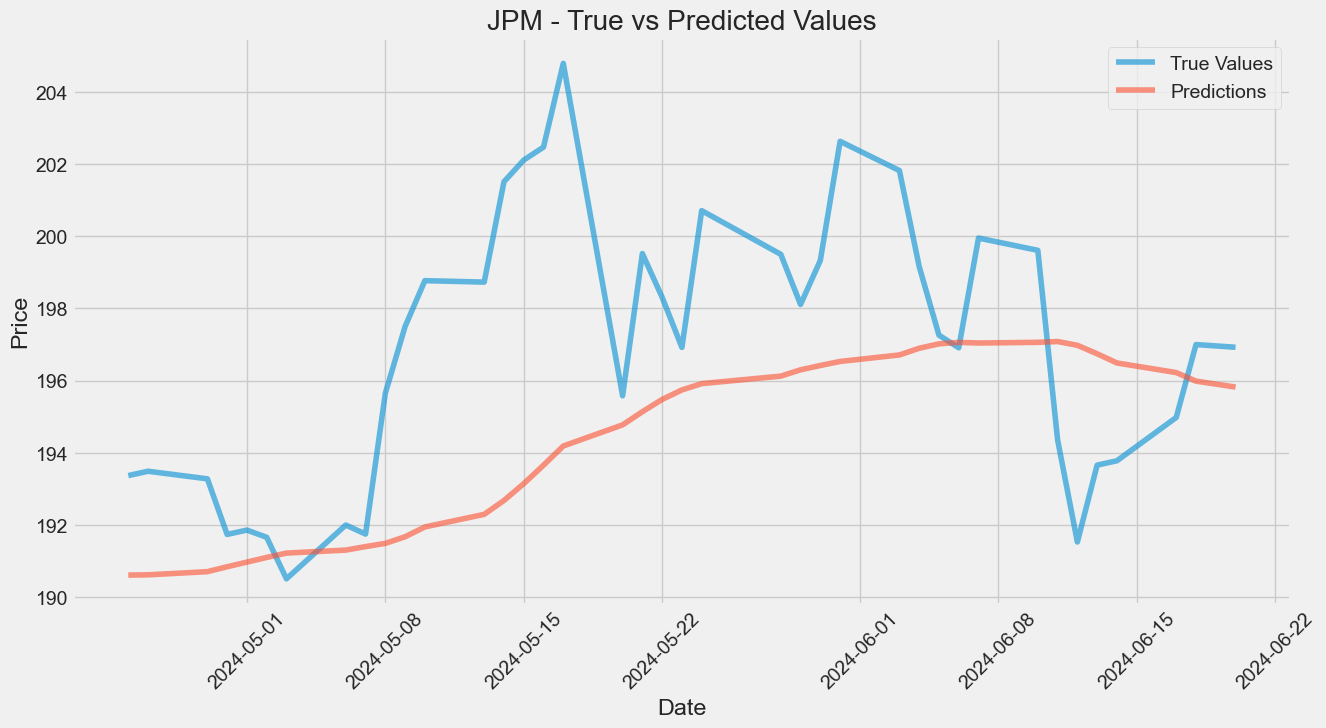



Training model for BAC...

Epoch 1/100
4/4 [==============================] - 5s 275ms/step - loss: 0.1519 - val_loss: 0.2725
Epoch 2/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0429 - val_loss: 0.0183
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0193 - val_loss: 0.0106
Epoch 4/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0199 - val_loss: 0.0131
Epoch 5/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0110 - val_loss: 0.0396
Epoch 6/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0140 - val_loss: 0.0386
Epoch 7/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0108 - val_loss: 0.0178
Epoch 8/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 9/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0095 - val_loss: 0.0045
Epoch 10/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0095 - val_lo

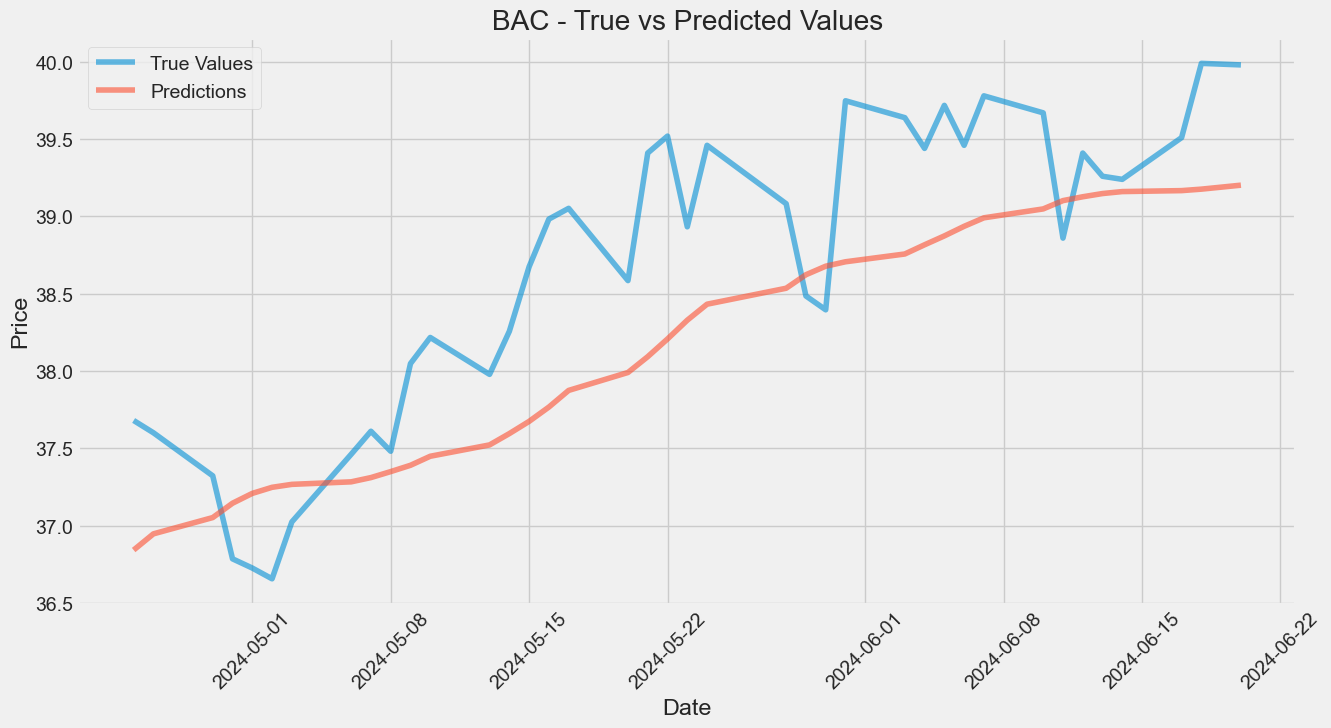



Training model for WFC...

Epoch 1/100
4/4 [==============================] - 4s 272ms/step - loss: 0.1176 - val_loss: 0.2333
Epoch 2/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0290 - val_loss: 0.0231
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0293 - val_loss: 0.0137
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0137 - val_loss: 0.0255
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0160 - val_loss: 0.0479
Epoch 6/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0161 - val_loss: 0.0182
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0098 - val_loss: 0.0035
Epoch 8/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0121 - val_loss: 0.0173
Epoch 9/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0105 - val_loss: 0.0053
Epoch 10/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0068 - val_lo

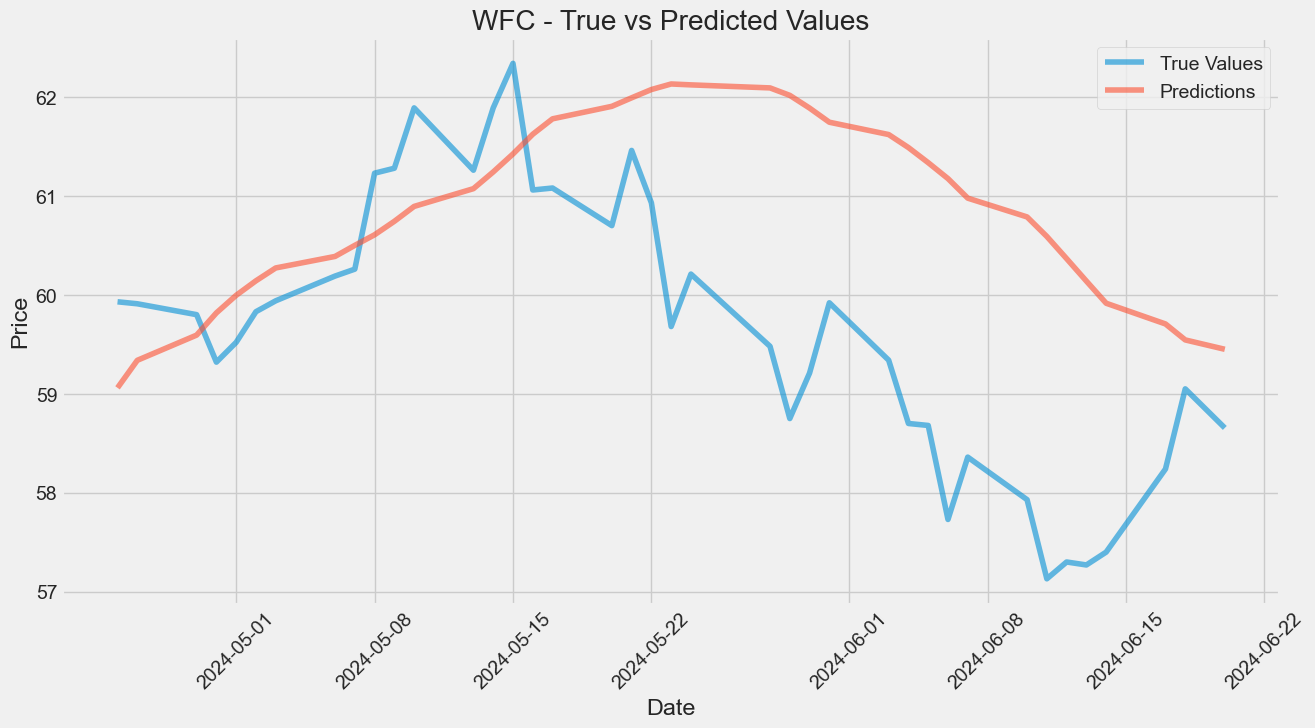



Training model for C...

Epoch 1/100
4/4 [==============================] - 5s 281ms/step - loss: 0.1425 - val_loss: 0.2373
Epoch 2/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0323 - val_loss: 0.0064
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0256 - val_loss: 0.0184
Epoch 4/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0127 - val_loss: 0.0192
Epoch 5/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0086 - val_loss: 0.0479
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0121 - val_loss: 0.0359
Epoch 7/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0083 - val_loss: 0.0105
Epoch 8/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 9/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 10/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0051 - val_loss

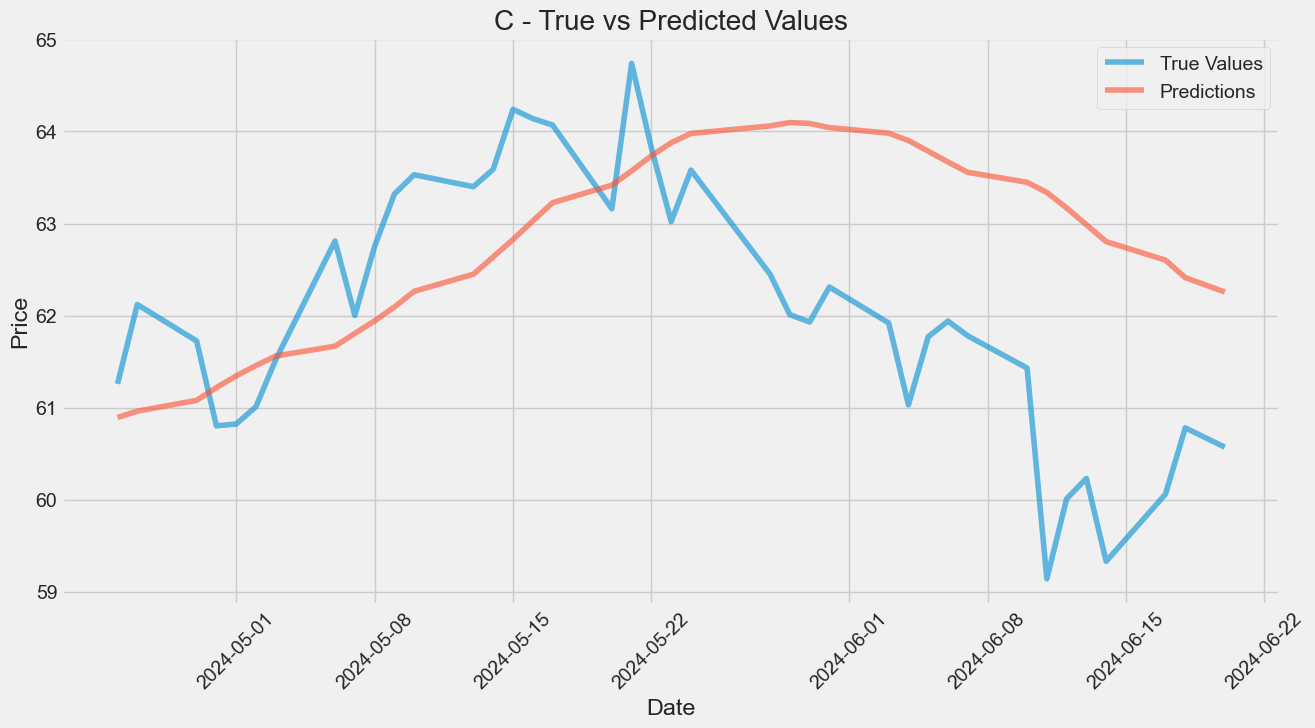

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime

# List of stocks
tech_list = ['JPM', 'BAC', 'WFC', 'C']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download and prepare data for each stock
data = {}
for stock in tech_list:
    data[stock] = yf.download(stock, start=start, end=end)['Adj Close']

# Parameters for the LSTM model
n_steps = 60  # Size of the time series window
n_features = 1  # Number of features (only closing price is used)

# Store predictions for each stock
predictions = {}

for stock in tech_list:
    print(f"\n\nTraining model for {stock}...\n")
    # Prepare the data
    dataset = data[stock].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Window the time series data
    X, y = [], []
    dates = data[stock].index[n_steps:]  # Dates for the predictions
    for i in range(n_steps, len(dataset)):
        X.append(dataset[i - n_steps:i, 0])
        y.append(dataset[i, 0])
    X, y = np.array(X), np.array(y)

    # Split the data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    # Define the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, n_features)))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(units=50, return_sequences=False))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(units=1))

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Make predictions
    predictions[stock] = model_lstm.predict(X_test)

    # Compute performance metrics
    mse = mean_squared_error(y_test, predictions[stock])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions[stock])

    print(f"{stock} - Mean Squared Error (MSE): {mse}")
    print(f"{stock} - Root Mean Squared Error (RMSE): {rmse}")
    print(f"{stock} - Mean Absolute Error (MAE): {mae}")

    # Inverse transform the predictions and true values to get back to original scale
    predictions_inverse = scaler.inverse_transform(predictions[stock])
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the predictions vs true values with dates on x-axis
    plt.figure(figsize=(14, 7))
    plt.plot(dates_test, y_test_inverse, label='True Values', alpha=0.6)
    plt.plot(dates_test, predictions_inverse, label='Predictions', alpha=0.6)
    plt.title(f"{stock} - True vs Predicted Values")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed




Training model for JPM...

Epoch 1/100
4/4 [==============================] - 5s 283ms/step - loss: 0.1564 - val_loss: 0.2392
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0283 - val_loss: 0.0298
Epoch 3/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0278 - val_loss: 0.0116
Epoch 4/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0104 - val_loss: 0.0420
Epoch 5/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0165 - val_loss: 0.0471
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0124 - val_loss: 0.0173
Epoch 7/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0069 - val_loss: 0.0120
Epoch 8/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0095 - val_loss: 0.0132
Epoch 9/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0049 - val_loss: 0.0100
Epoch 10/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0061 - val_lo

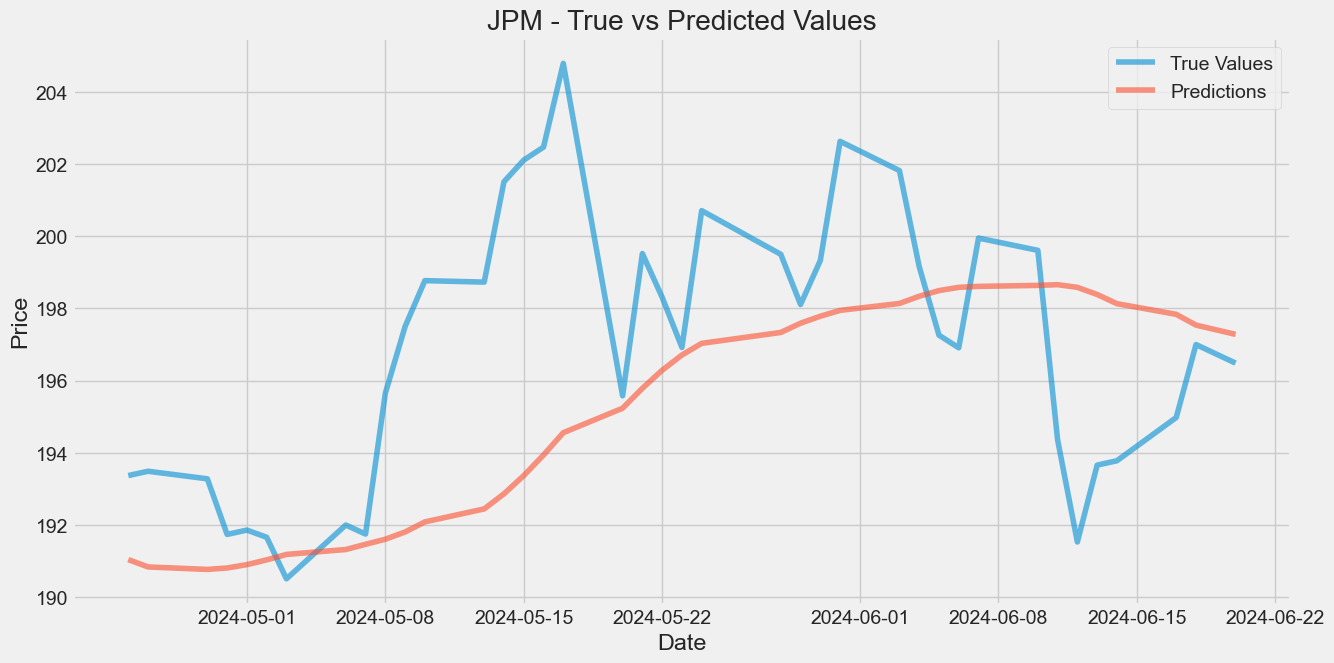



Training model for BAC...

Epoch 1/100
4/4 [==============================] - 5s 473ms/step - loss: 0.1508 - val_loss: 0.2458
Epoch 2/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0379 - val_loss: 0.0054
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0243 - val_loss: 0.0136
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0128 - val_loss: 0.0501
Epoch 6/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0157 - val_loss: 0.0389
Epoch 7/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 8/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0088 - val_loss: 0.0045
Epoch 9/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 10/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0085 - val_lo

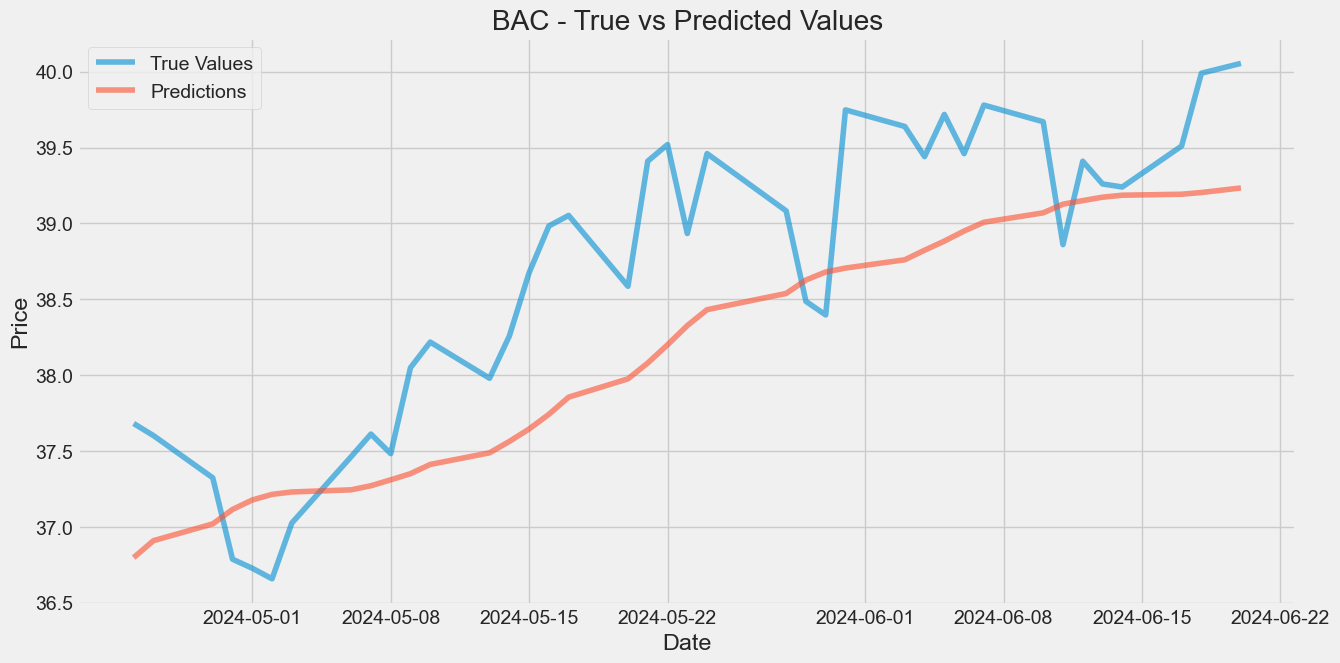



Training model for WFC...

Epoch 1/100
4/4 [==============================] - 4s 269ms/step - loss: 0.0998 - val_loss: 0.1816
Epoch 2/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0223 - val_loss: 0.0098
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0235 - val_loss: 0.0095
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0125 - val_loss: 0.0213
Epoch 5/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0127 - val_loss: 0.0423
Epoch 6/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0145 - val_loss: 0.0186
Epoch 7/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0091 - val_loss: 0.0030
Epoch 8/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 9/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0088 - val_loss: 0.0034
Epoch 10/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0063 - val_lo

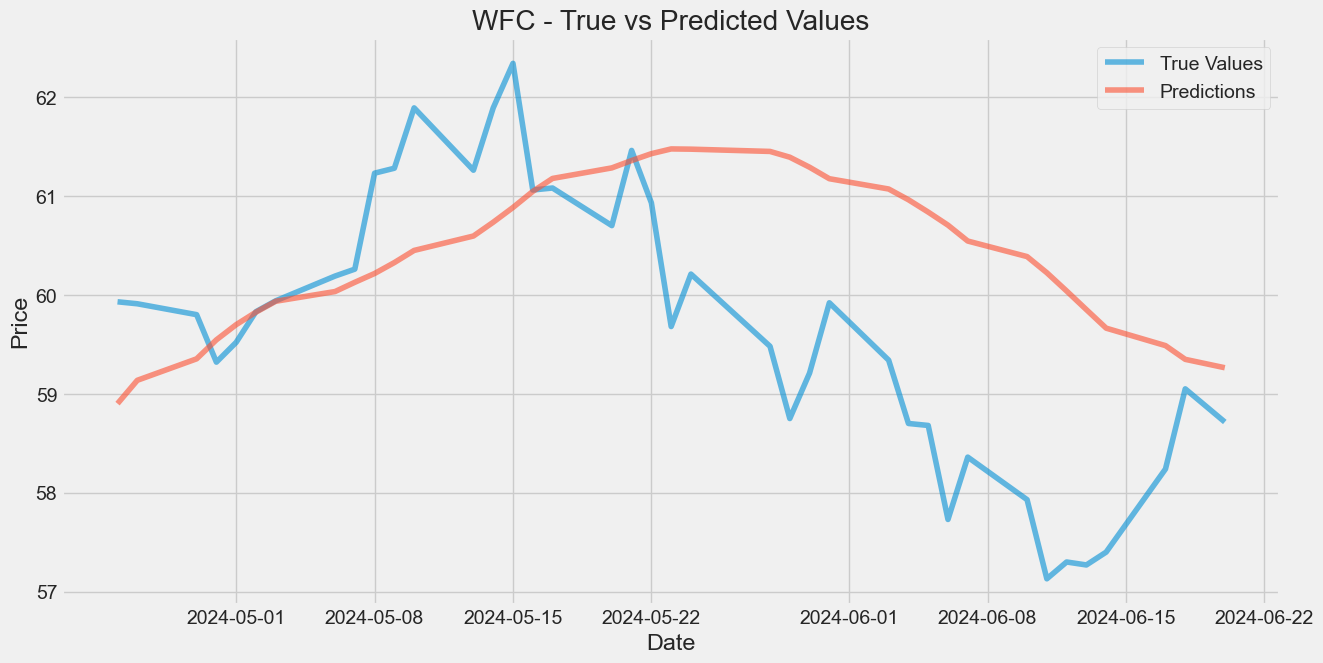



Training model for C...

Epoch 1/100
4/4 [==============================] - 5s 278ms/step - loss: 0.1037 - val_loss: 0.1372
Epoch 2/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0186 - val_loss: 0.0327
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0266 - val_loss: 0.0081
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0101 - val_loss: 0.0310
Epoch 5/100
4/4 [==============================] - 0s 50ms/step - loss: 0.0114 - val_loss: 0.0470
Epoch 6/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0122 - val_loss: 0.0259
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 8/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 9/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 10/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0058 - val_loss

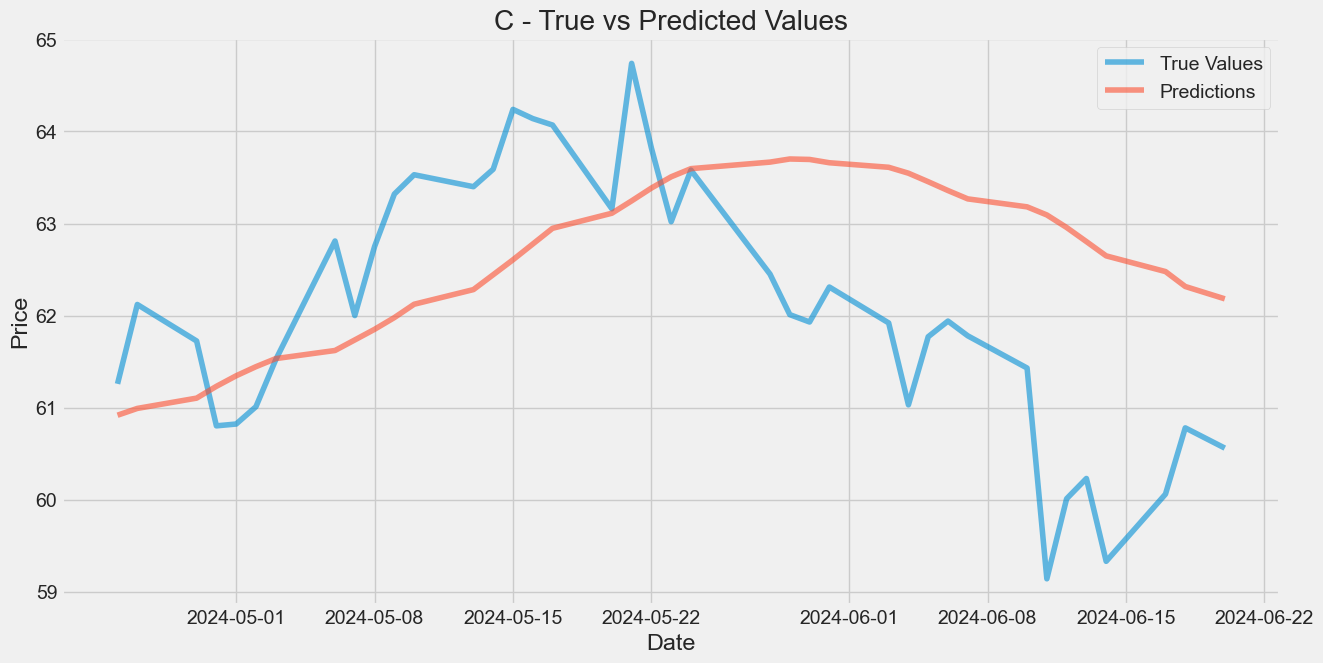

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import yfinance as yf
from datetime import datetime

# Hisse senedi listesi
tech_list = ['JPM', 'BAC', 'WFC', 'C']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Her hisse senedi için veri indirme
data = {}
for stock in tech_list:
    data[stock] = yf.download(stock, start=start, end=end)['Adj Close']

# LSTM modeli için parametreler
n_steps = 60  # Zaman serisi penceresi boyutu
n_features = 1  # Öznitelik sayısı (sadece kapanış fiyatı kullanılacak)

# Her hisse senedi için ayrı LSTM modeli ve tahminler
for stock in tech_list:
    print(f"\n\nTraining model for {stock}...\n")
    # Veriyi hazırlama
    dataset = data[stock].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Zaman serisi verilerini pencereleme
    X, y = [], []
    dates = data[stock].index[n_steps:]  # Tahminlerde kullanılacak tarihler
    for i in range(n_steps, len(dataset)):
        X.append(dataset[i - n_steps:i, 0])
        y.append(dataset[i, 0])
    X, y = np.array(X), np.array(y)

    # Veriyi eğitim ve test setlerine ayırma (şimdi tarihlerle birlikte)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    dates_train, dates_test = dates[:train_size], dates[train_size:]

    # Girdi verilerini LSTM için şekillendirme
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    # LSTM modeli tanımlama
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, n_features)))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(units=50, return_sequences=False))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(units=1))

    # Modeli derleme
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Modeli eğitme
    history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Tahmin yapma
    predictions = model_lstm.predict(X_test)

    # Tahmin performansını hesaplama
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    print(f"{stock} - Mean Squared Error (MSE): {mse}")
    print(f"{stock} - Root Mean Squared Error (RMSE): {rmse}")
    print(f"{stock} - Mean Absolute Error (MAE): {mae}")

    # Tahminler ve gerçek değerleri ölçek geri dönüşümü (inverse transform)
    predictions_inverse = scaler.inverse_transform(predictions)
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Tahminler ve gerçek değerleri görselleştirme
    plt.figure(figsize=(14, 7))
    plt.plot(dates_test, y_test_inverse, label='True Values', alpha=0.6)
    plt.plot(dates_test, predictions_inverse, label='Predictions', alpha=0.6)
    plt.title(f"{stock} - True vs Predicted Values")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 2ms/step
JPM Model - Mean Squared Error (MSE): 282.0154147326841
JPM Model - Mean Absolute Error (MAE): 14.85076156317019
JPM Model - Root Mean Squared Error (RMSE): 16.793314584461406

2/2 [==============================] - 0s 1ms/step
BAC Model - Mean Squared Error (MSE): 2.7733644737525216
BAC Model - Mean Absolute Error (MAE): 1.2851258446188534
BAC Model - Root Mean Squared Error (RMSE): 1.6653421491550984

2/2 [==============================] - 0s 991us/step
WFC Model - Mean Squared Error (MSE): 1.8536676934956773
WFC Model - Mean Absolute Error (MAE): 1.0962099561504288
WFC Model - Root Mean Squared Error (RMSE): 1.361494654229563

2/2 [==============================] - 0s 2ms/step
C Model - Mean Squared Error (MSE): 2.293923694494308
C Model - Mean Absolute Error (MAE): 1.2797698974609375
C Model - Root Mean Squared Error (RMSE): 1.5145704653446495



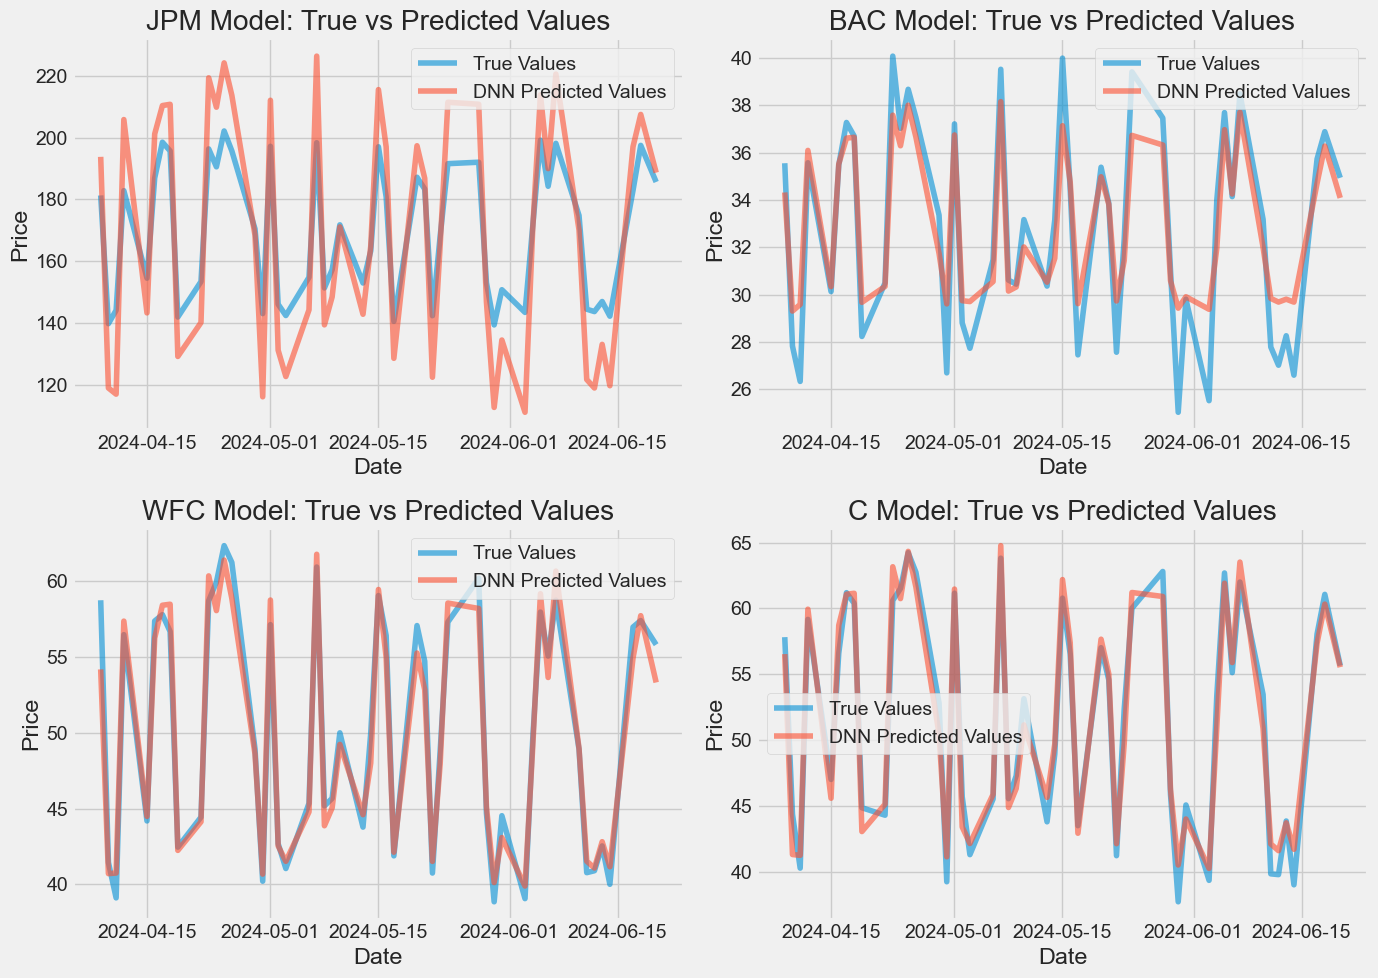

Overall Evaluation Metrics:
JPM Model - Mean Squared Error (MSE): 282.0154147326841
JPM Model - Mean Absolute Error (MAE): 14.85076156317019
JPM Model - Root Mean Squared Error (RMSE): 16.793314584461406

BAC Model - Mean Squared Error (MSE): 2.7733644737525216
BAC Model - Mean Absolute Error (MAE): 1.2851258446188534
BAC Model - Root Mean Squared Error (RMSE): 1.6653421491550984

WFC Model - Mean Squared Error (MSE): 1.8536676934956773
WFC Model - Mean Absolute Error (MAE): 1.0962099561504288
WFC Model - Root Mean Squared Error (RMSE): 1.361494654229563

C Model - Mean Squared Error (MSE): 2.293923694494308
C Model - Mean Absolute Error (MAE): 1.2797698974609375
C Model - Root Mean Squared Error (RMSE): 1.5145704653446495



In [86]:
# Define stock symbols and time range
tech_list = ['JPM', 'BAC', 'WFC', 'C']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data
company_list = [yf.download(stock, start=start, end=end)['Adj Close'] for stock in tech_list]

# Concatenate the data into a single DataFrame
closing_df = pd.concat(company_list, axis=1)
closing_df.columns = tech_list

# Prepare data for training and testing
X = closing_df.values
y = closing_df.shift(-1).fillna(method='ffill').values  # Predict next day Adj Close for each stock

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a scaler: MinMaxScaler or StandardScaler
scaler = MinMaxScaler()  # or StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the Dense Neural Network (DNN) model
input_dim = X_train_normalized.shape[1]

model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the DNN model
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the DNN model for each stock
predictions_dnn = []
mse_dnn = []
mae_dnn = []
rmse_dnn = []

plt.figure(figsize=(14, 10))

for i, stock in enumerate(tech_list):
    # Prepare y_train for the current stock
    y_train_stock = y_train[:, i]

    # Train the DNN model for the current stock
    history_dnn = model_dnn.fit(
        X_train_normalized,
        y_train_stock,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Make predictions with DNN for the current stock
    predictions_stock = model_dnn.predict(X_test_normalized)

    # Evaluate DNN model performance for the current stock
    mse_stock = mean_squared_error(y_test[:, i], predictions_stock)
    mae_stock = mean_absolute_error(y_test[:, i], predictions_stock)
    rmse_stock = np.sqrt(mse_stock)

    # Store evaluation metrics
    mse_dnn.append(mse_stock)
    mae_dnn.append(mae_stock)
    rmse_dnn.append(rmse_stock)

    # Plot predictions vs actual values for the current stock
    plt.subplot(2, 2, i+1)
    plt.plot(closing_df.index[-len(predictions_stock):], y_test[:, i], label='True Values', alpha=0.6)
    plt.plot(closing_df.index[-len(predictions_stock):], predictions_stock, label='DNN Predicted Values', alpha=0.6)
    plt.title(f'{stock} Model: True vs Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Print evaluation metrics for the current stock
    print(f'{stock} Model - Mean Squared Error (MSE): {mse_stock}')
    print(f'{stock} Model - Mean Absolute Error (MAE): {mae_stock}')
    print(f'{stock} Model - Root Mean Squared Error (RMSE): {rmse_stock}')
    print()

plt.tight_layout()
plt.show()

# Print overall evaluation metrics
print('Overall Evaluation Metrics:')
for i, stock in enumerate(tech_list):
    print(f'{stock} Model - Mean Squared Error (MSE): {mse_dnn[i]}')
    print(f'{stock} Model - Mean Absolute Error (MAE): {mae_dnn[i]}')
    print(f'{stock} Model - Root Mean Squared Error (RMSE): {rmse_dnn[i]}')
    print()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 0s 2ms/step
JPMorgan - Mean Squared Error (MSE): 0.007951037039553136
JPMorgan - Mean Absolute Error (MAE): 0.07156918737450729
JPMorgan - Root Mean Squared Error (RMSE): 0.08916858774003958


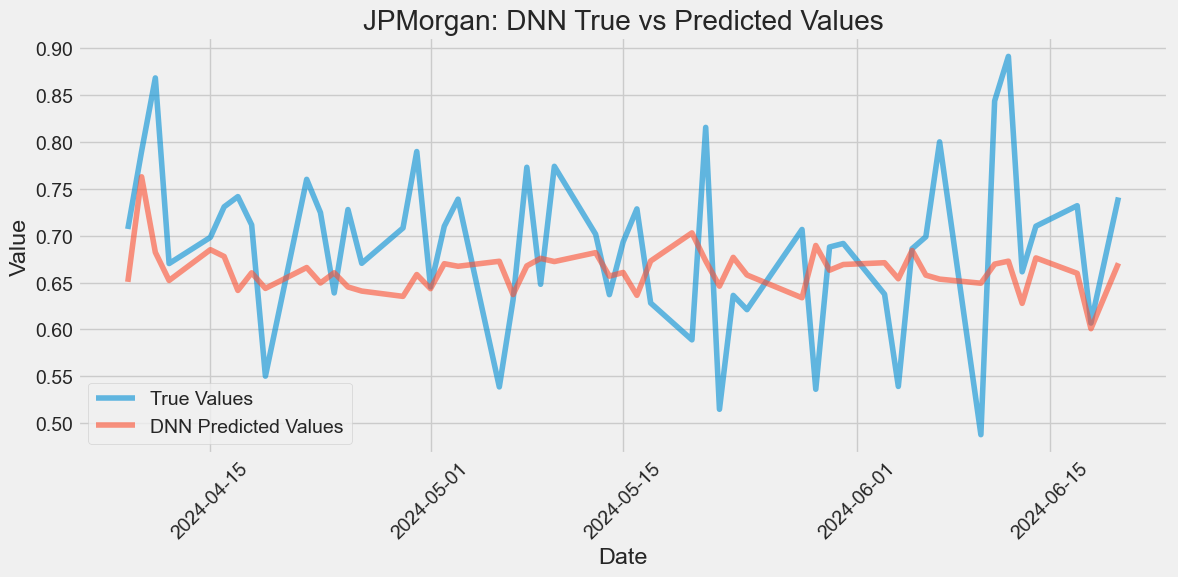

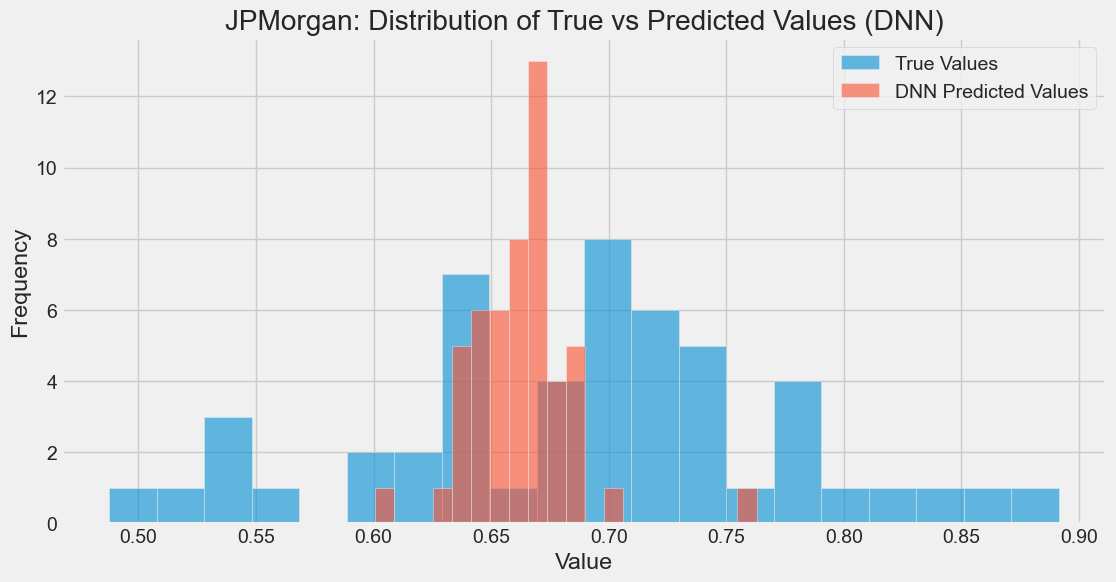

2/2 [==============================] - 0s 2ms/step
Bank of America - Mean Squared Error (MSE): 0.01676597750231491
Bank of America - Mean Absolute Error (MAE): 0.1010806614885115
Bank of America - Root Mean Squared Error (RMSE): 0.1294835028191426


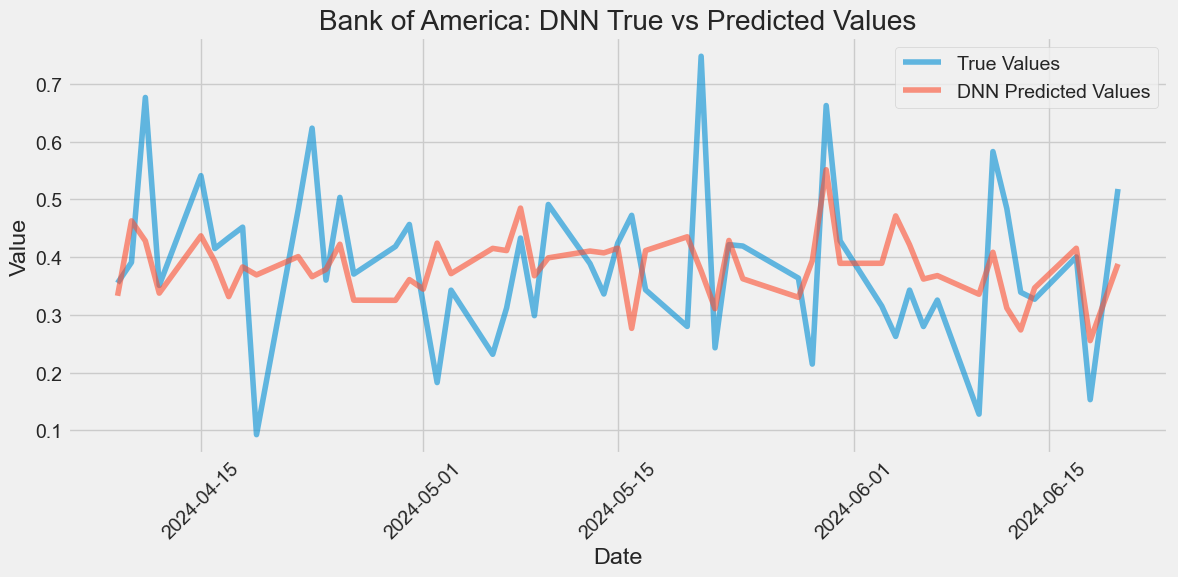

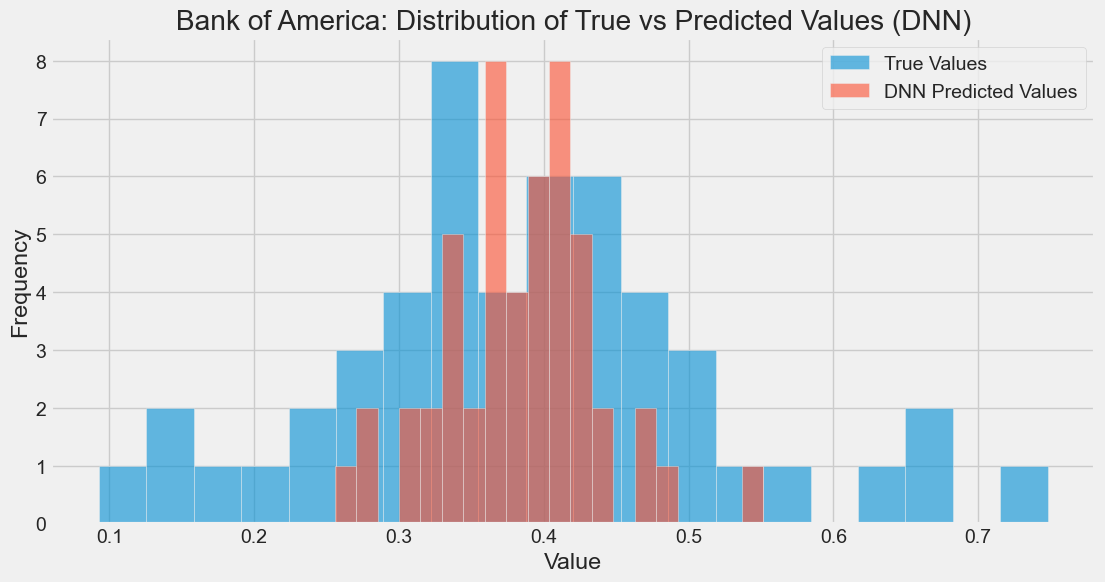

2/2 [==============================] - 0s 2ms/step
Wells Fargo - Mean Squared Error (MSE): 0.021392696122310612
Wells Fargo - Mean Absolute Error (MAE): 0.10618971123220296
Wells Fargo - Root Mean Squared Error (RMSE): 0.14626242211282642


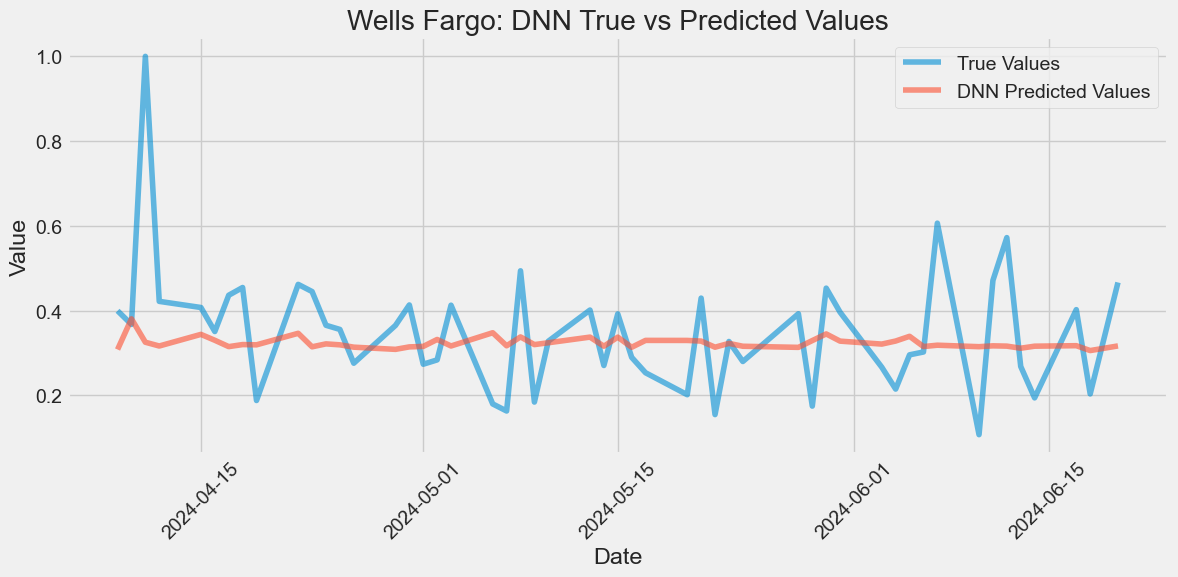

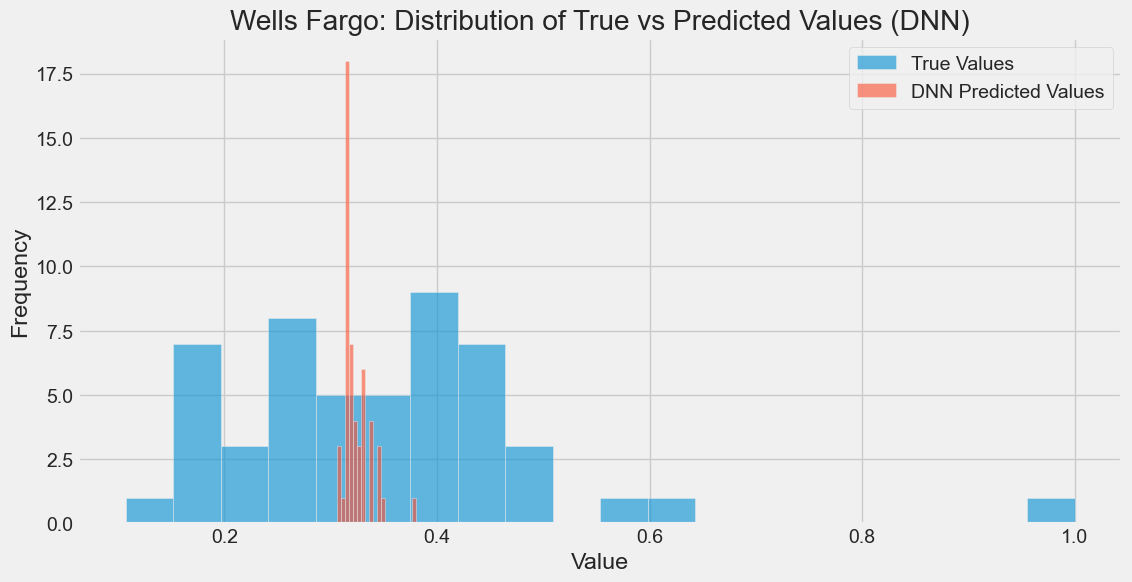

2/2 [==============================] - 0s 2ms/step
Citigroup - Mean Squared Error (MSE): 0.023073848574521442
Citigroup - Mean Absolute Error (MAE): 0.11331243253324136
Citigroup - Root Mean Squared Error (RMSE): 0.15190078529922563


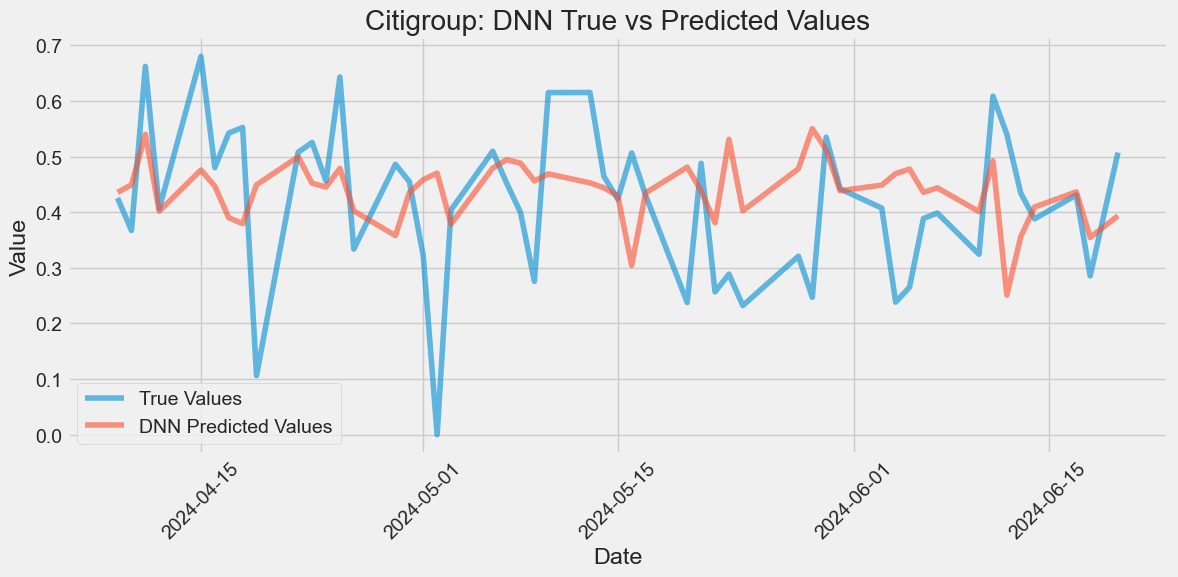

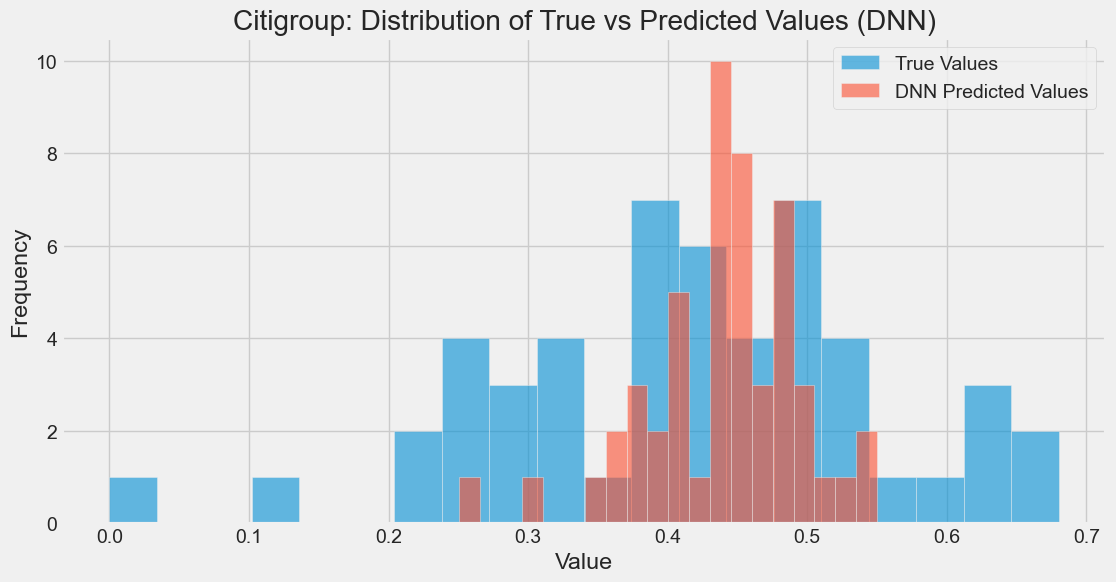

In [83]:
# Define the list of companies and their ticker symbols
company_names = ['JPMorgan', 'Bank of America', 'Wells Fargo', 'Citigroup']
tickers = ['JPM', 'BAC', 'WFC', 'C']

# Define the start and end dates for the data
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

# Download stock data
data = {}
for name, ticker in zip(company_names, tickers):
    data[name] = yf.download(ticker, start=start_date, end=end_date)

# Prepare the data for DNN training and prediction
predictions = {}

for name in company_names:
    # Get the closing prices
    closing_prices = data[name]['Adj Close'].values
    # Calculate daily returns
    returns = pd.Series(closing_prices).pct_change().values[1:]
    
    # Split data into features (X) and target (y)
    X = returns[:-1]  # Use returns up to the second last day as features
    y = returns[1:]   # Predict returns for the next day
    
    # Normalize the data
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X.reshape(-1, 1))
    y_normalized = scaler.transform(y.reshape(-1, 1))
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)
    
    # Define the DNN model
    input_dim = X_train.shape[1]
    model_dnn = Sequential()
    model_dnn.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model_dnn.add(Dense(64, activation='relu'))
    model_dnn.add(Dense(32, activation='relu'))
    model_dnn.add(Dense(1, activation='linear'))  # Output layer for regression
    
    # Compile the DNN model
    model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Implement Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the DNN model
    history_dnn = model_dnn.fit(
        X_train,
        y_train,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Make predictions with DNN
    predictions[name] = model_dnn.predict(X_test)
    
    # Evaluate DNN model performance
    mse_dnn = mean_squared_error(y_test, predictions[name])
    mae_dnn = mean_absolute_error(y_test, predictions[name])
    rmse_dnn = np.sqrt(mse_dnn)
    
    print(f'{name} - Mean Squared Error (MSE): {mse_dnn}')
    print(f'{name} - Mean Absolute Error (MAE): {mae_dnn}')
    print(f'{name} - Root Mean Squared Error (RMSE): {rmse_dnn}')
    
    # Plot predictions vs actual values for DNN
    plt.figure(figsize=(12, 6))
    plt.plot(data[name].index[-len(y_test):], y_test, label='True Values', alpha=0.6)
    plt.plot(data[name].index[-len(y_test):], predictions[name], label='DNN Predicted Values', alpha=0.6)
    plt.title(f'{name}: DNN True vs Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot prediction distributions for DNN
    plt.figure(figsize=(12, 6))
    plt.hist(y_test, bins=20, alpha=0.6, label='True Values')
    plt.hist(predictions[name], bins=20, alpha=0.6, label='DNN Predicted Values')
    plt.title(f'{name}: Distribution of True vs Predicted Values (DNN)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## Insight from Model's Output:

- **Training Process**:
  - During the training process, the model's loss decreased steadily over the 100 epochs, indicating effective learning.
  - This reduction in loss suggests that the model is progressively improving its ability to predict target values.

- **High Loss Values**:
  - Despite the decrease, the absolute loss values are quite high, indicating potential issues:
    - **Data Scaling**: Large scale of input data or target values may contribute to high loss. Consider normalization or standardization.
    - **Model Tuning**: Experiment with different architectures, hyperparameters, or optimization techniques to improve performance.
    - **Target Distribution**: Analyze target value distribution and consider transformations like logarithmic scaling.

Model Training and Validation Loss

[*********************100%%**********************]  1 of 1 completed

Processing META...


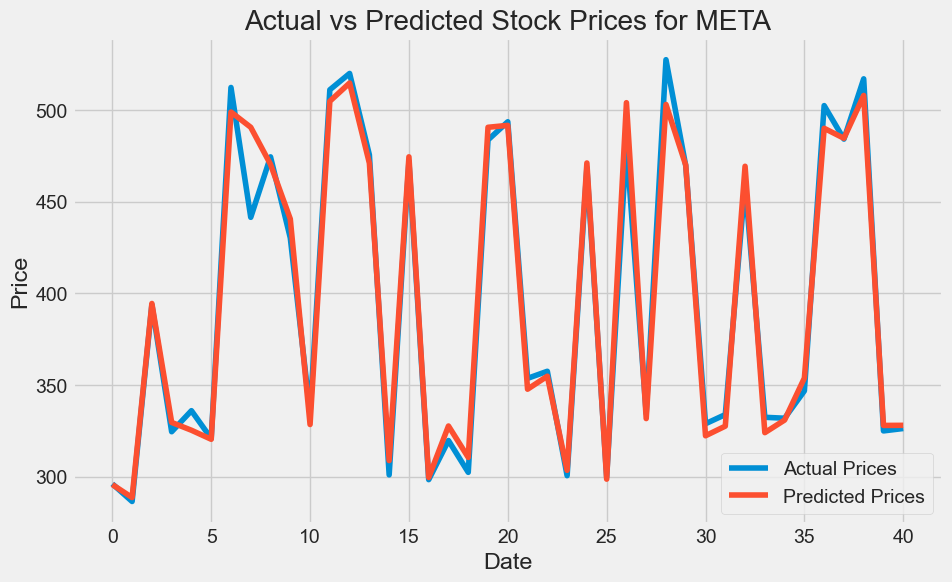

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


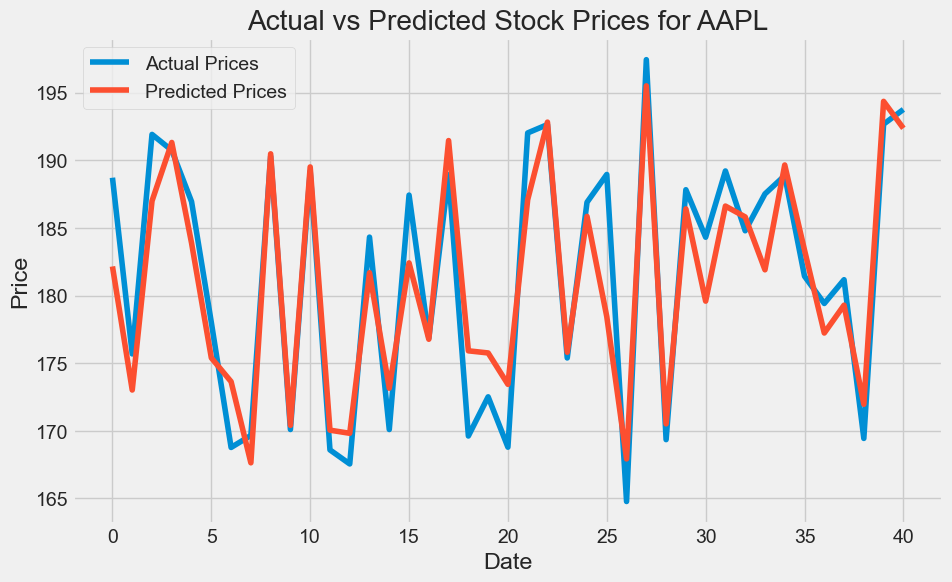

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


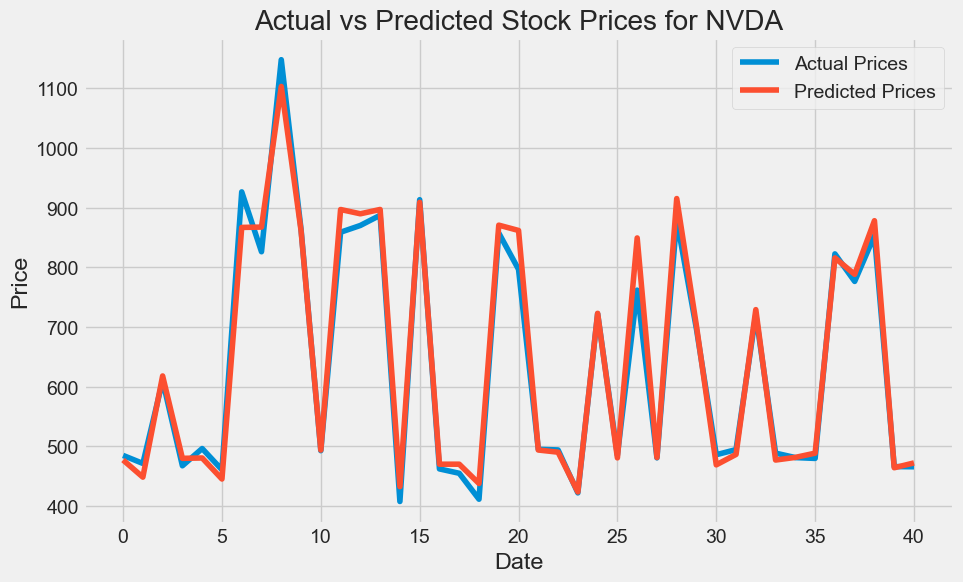

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


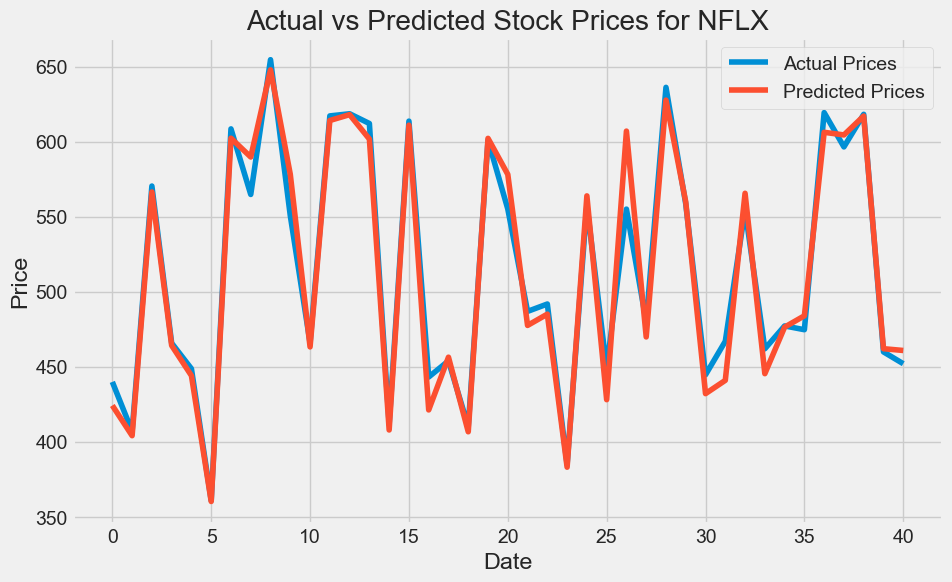

META:
Mean Squared Error: 120.90425980786517
Mean Absolute Error: 6.976403434116395

AAPL:
Mean Squared Error: 11.812314309833095
Mean Absolute Error: 2.6937501135105046

NVDA:
Mean Squared Error: 658.4043516457613
Mean Absolute Error: 17.116642471523324

NFLX:
Mean Squared Error: 196.46587527911143
Mean Absolute Error: 9.663600631341698



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Download stock data
yf.pdr_override()
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Function to prepare data for each stock
def prepare_data(ticker):
    stock = pdr.get_data_yahoo(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    rf = RandomForestRegressor()
    param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_rf = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_rf.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


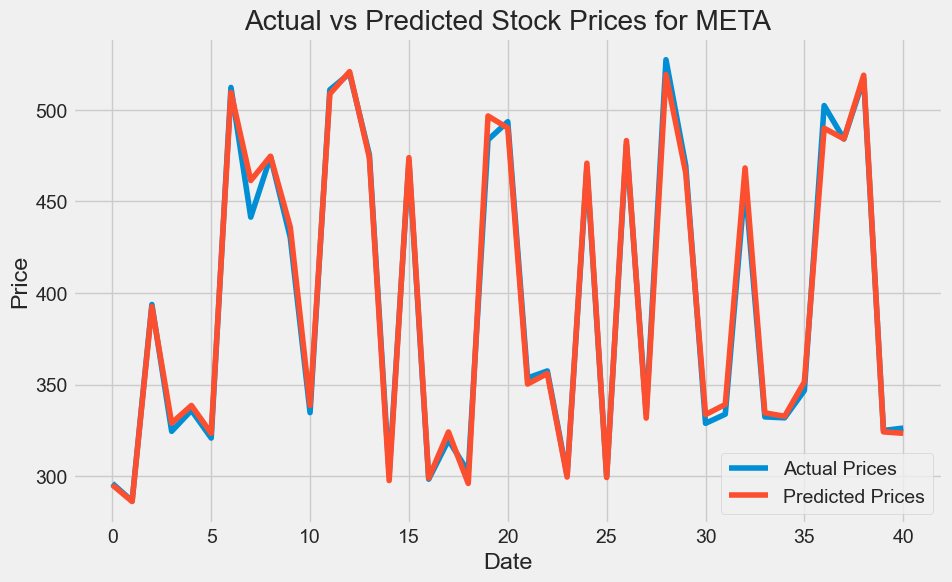

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


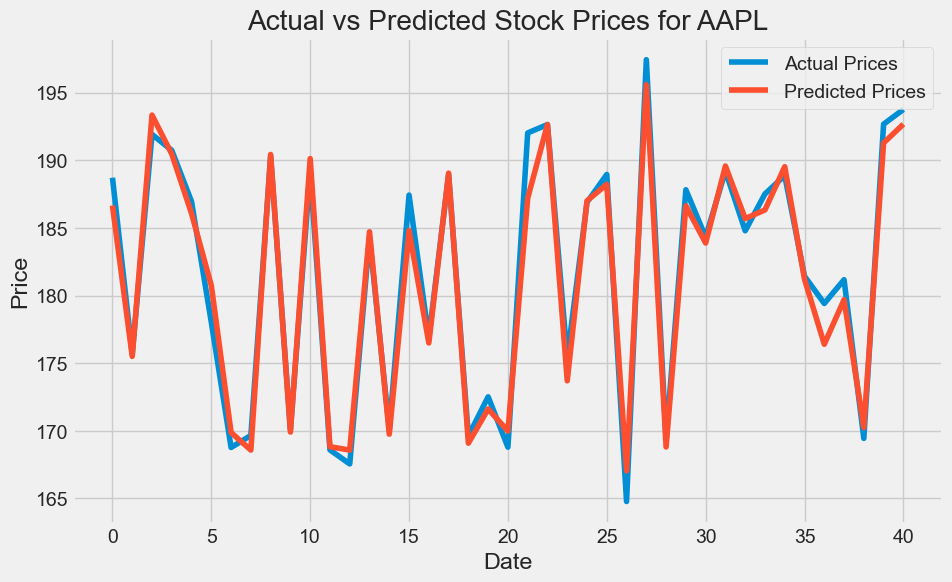

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


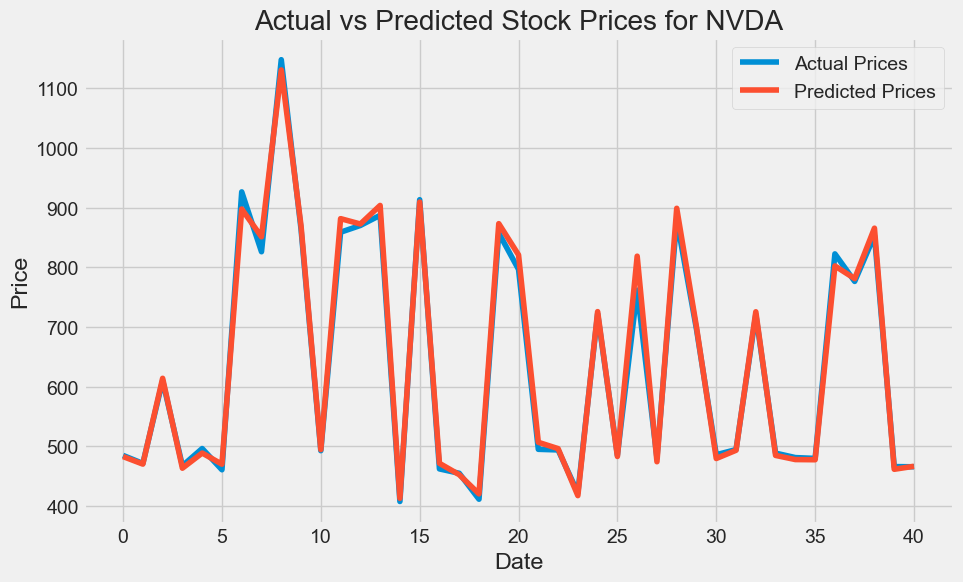

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


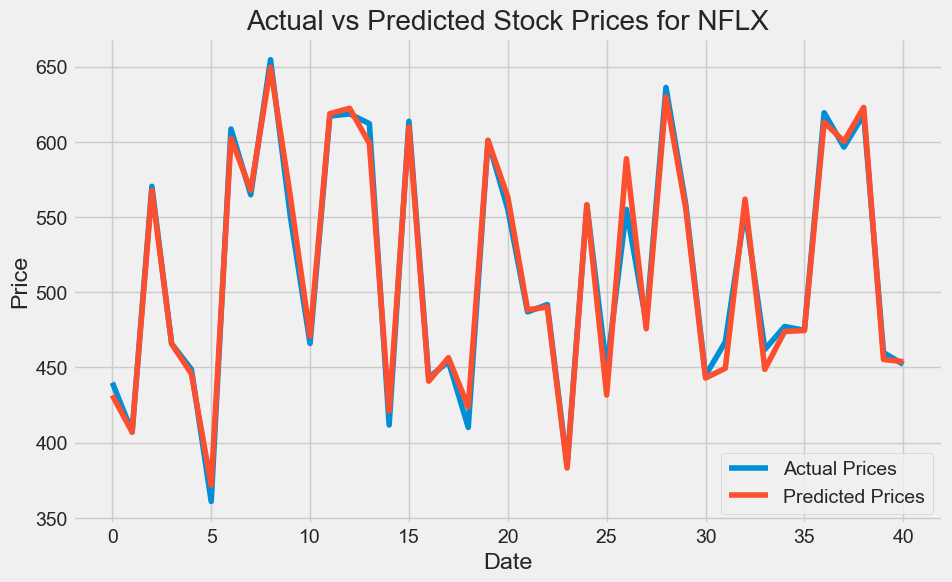

META:
Mean Squared Error: 29.013272520621328
Mean Absolute Error: 3.726685070599816

AAPL:
Mean Squared Error: 2.0439997239188927
Mean Absolute Error: 1.0598846605786592

NVDA:
Mean Squared Error: 203.70982546183967
Mean Absolute Error: 9.570515738284836

NFLX:
Mean Squared Error: 77.62173432314333
Mean Absolute Error: 6.076516550390683



In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


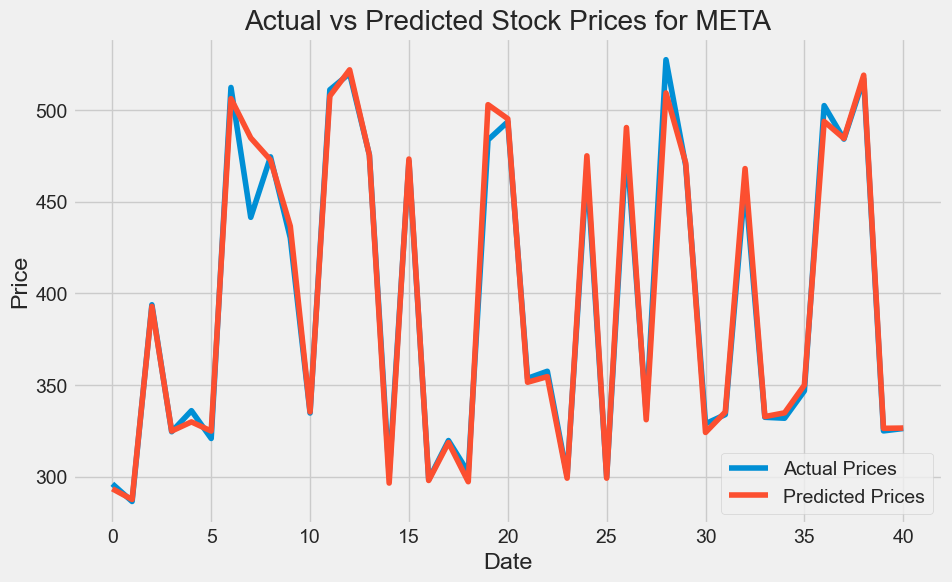

Processing AAPL...


[*********************100%%**********************]  1 of 1 completed


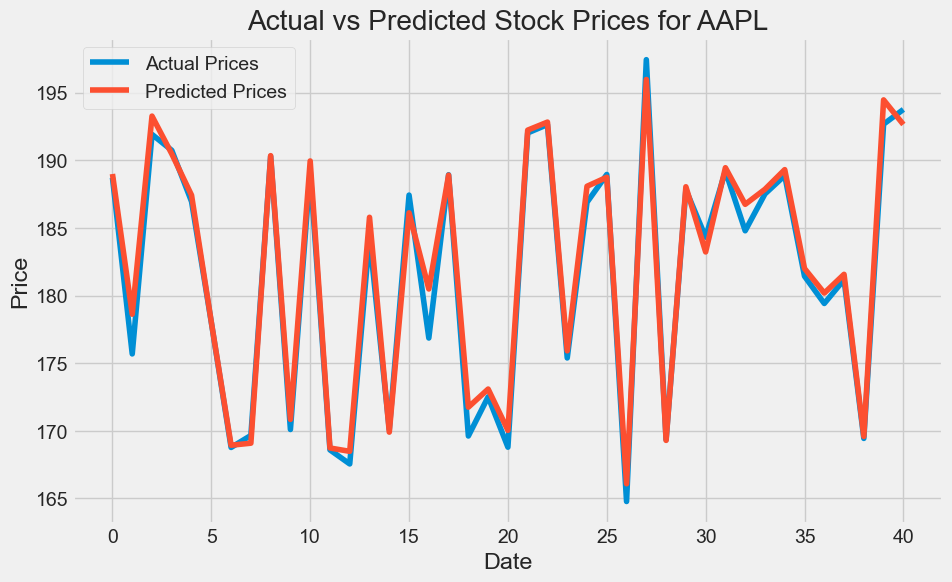

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


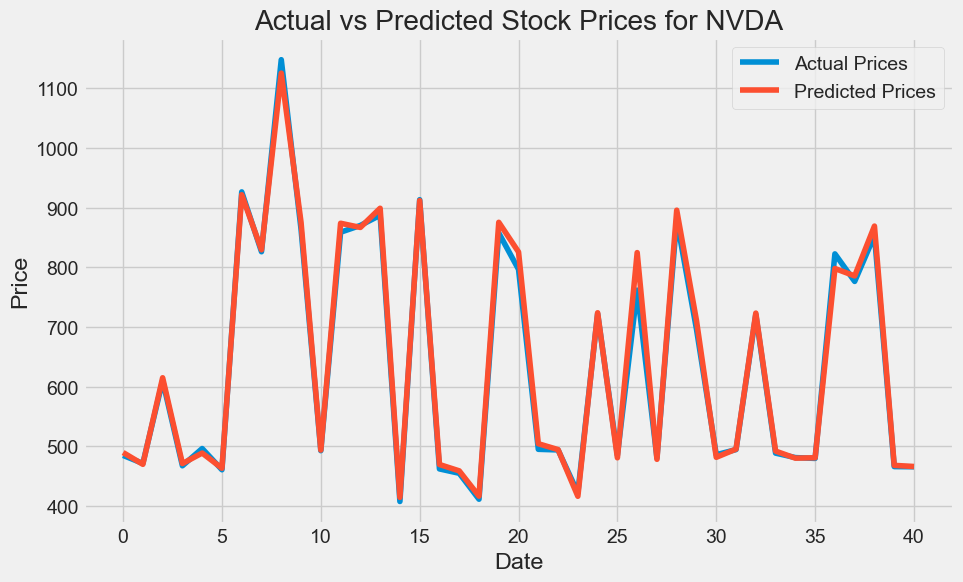

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


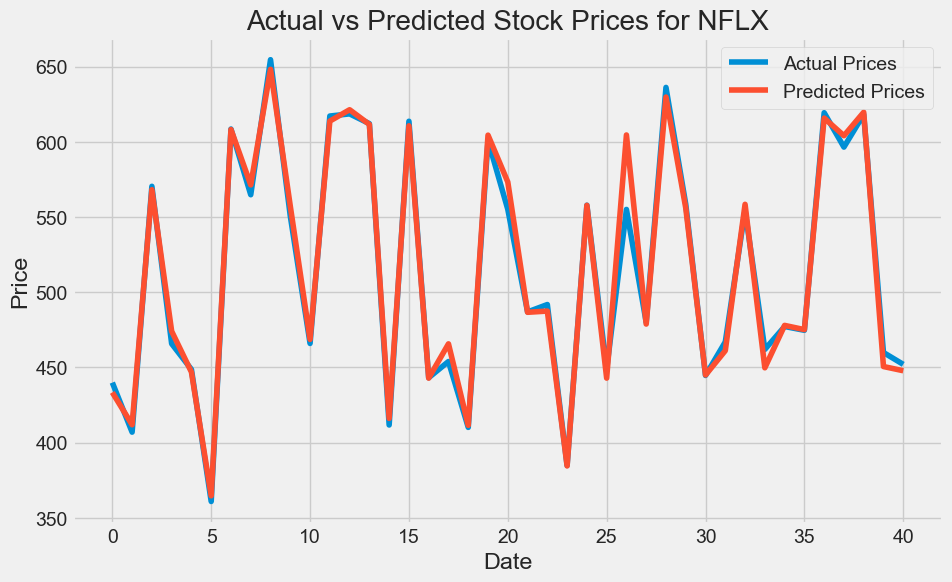

META:
Mean Squared Error: 76.43674072380207
Mean Absolute Error: 4.670031624959053

AAPL:
Mean Squared Error: 1.3000270080000167
Mean Absolute Error: 0.8162233908216887

NVDA:
Mean Squared Error: 196.0717772692133
Mean Absolute Error: 8.60221105899563

NFLX:
Mean Squared Error: 91.47280031585008
Mean Absolute Error: 5.347218156949888



In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


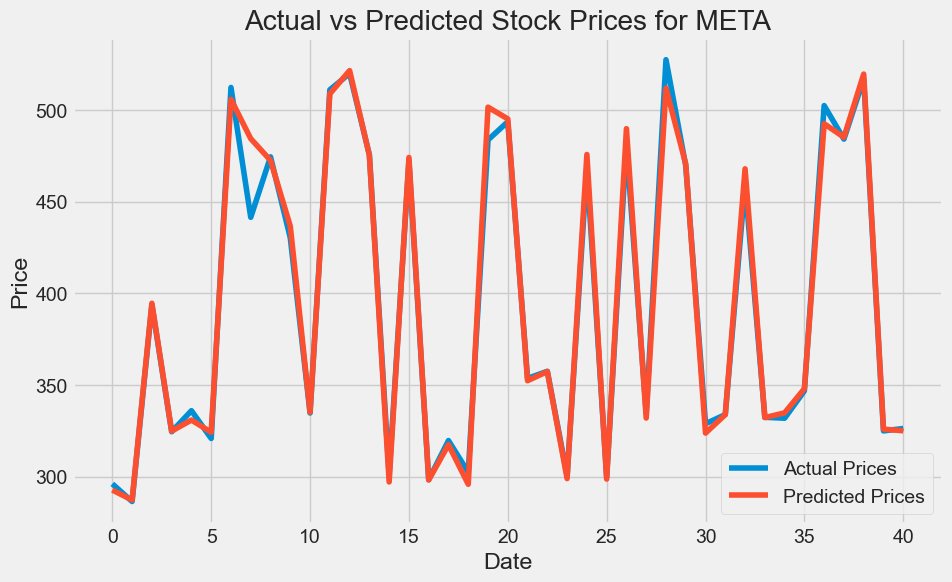

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


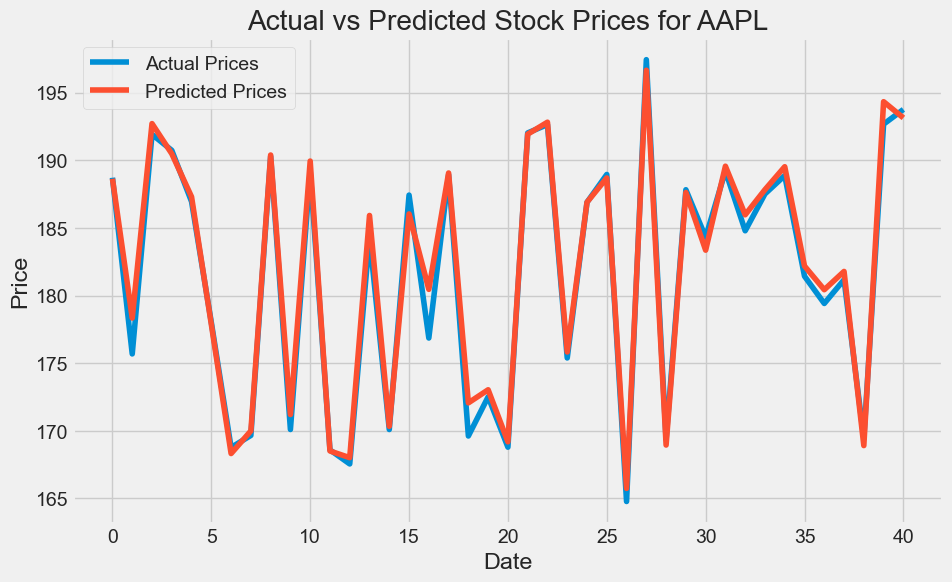

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


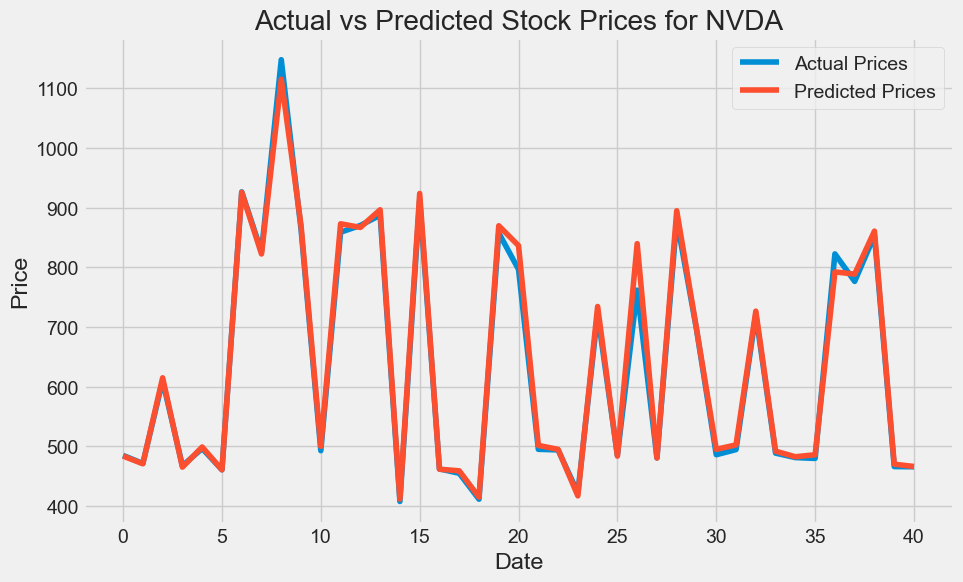

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


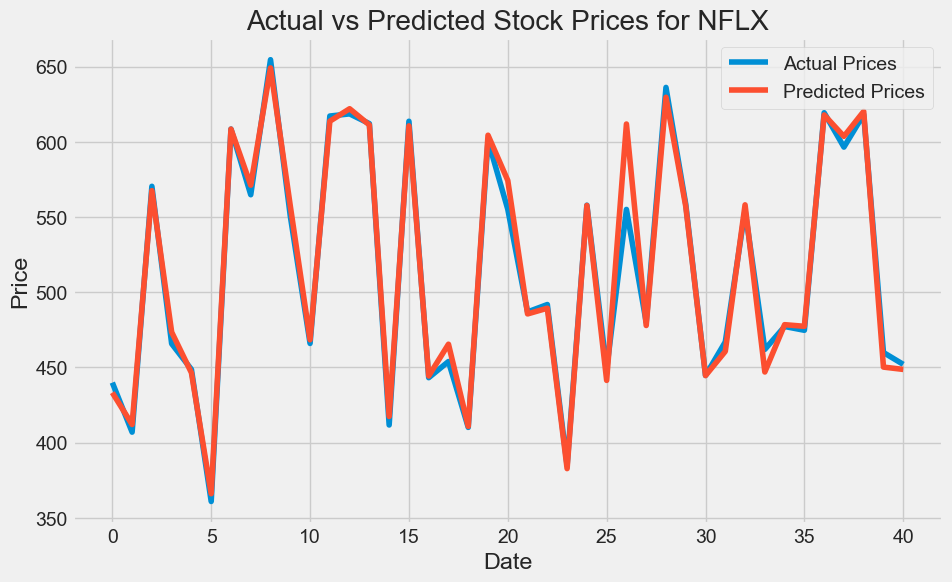

META:
Mean Squared Error: 72.25715131919927
Mean Absolute Error: 4.449294259040038

AAPL:
Mean Squared Error: 1.087594559372442
Mean Absolute Error: 0.7286874834633493

NVDA:
Mean Squared Error: 274.951002466877
Mean Absolute Error: 9.056490170455486

NFLX:
Mean Squared Error: 113.62666137096123
Mean Absolute Error: 5.7536296945965715



In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Custom function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()
    return obv

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock['OBV'] = calculate_obv(stock)
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2', 'OBV']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...


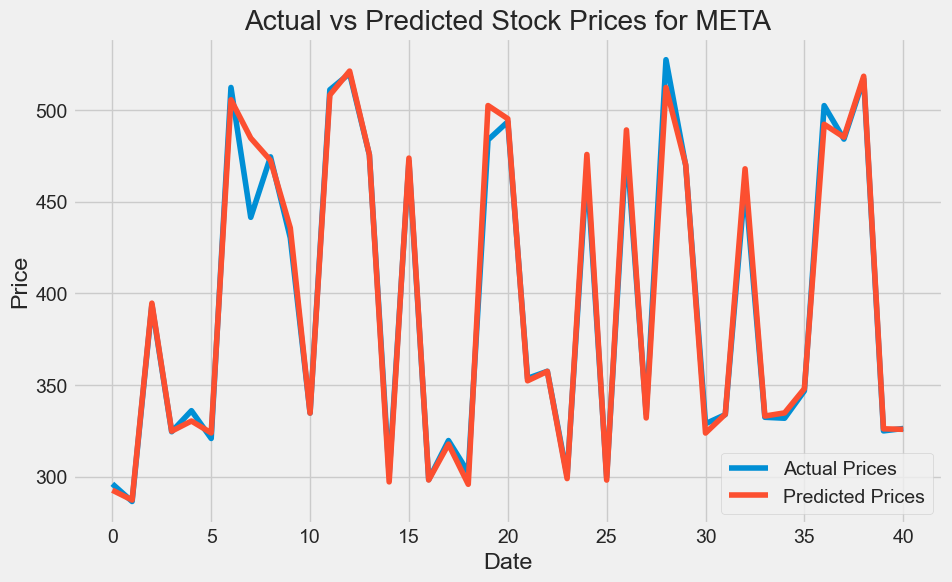

[*********************100%%**********************]  1 of 1 completed

Processing AAPL...


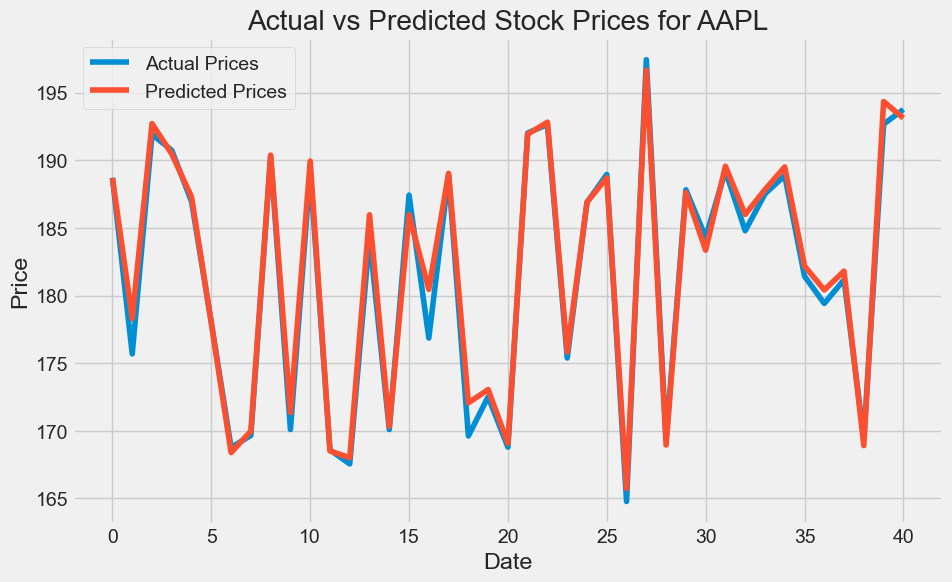

[*********************100%%**********************]  1 of 1 completed

Processing NVDA...


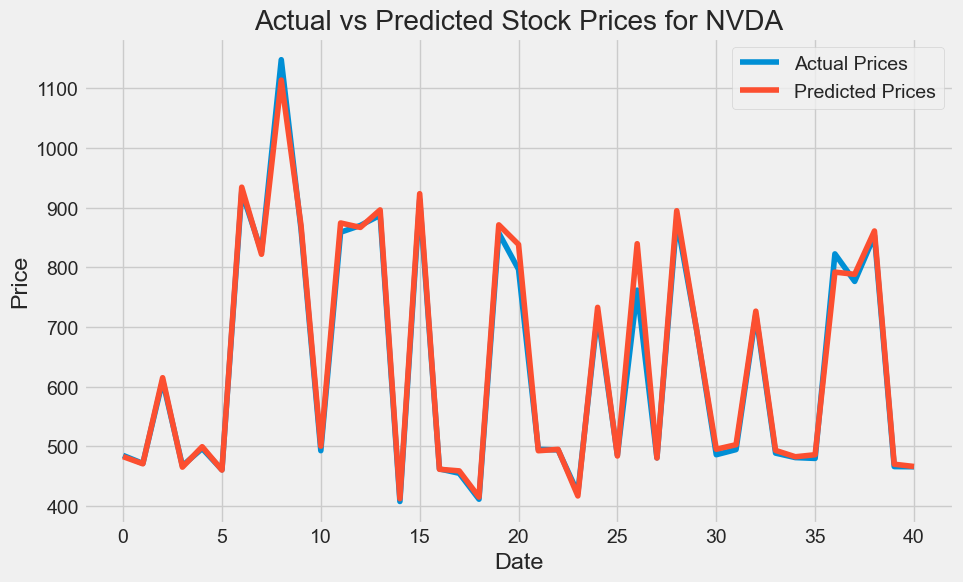

[*********************100%%**********************]  1 of 1 completed

Processing NFLX...


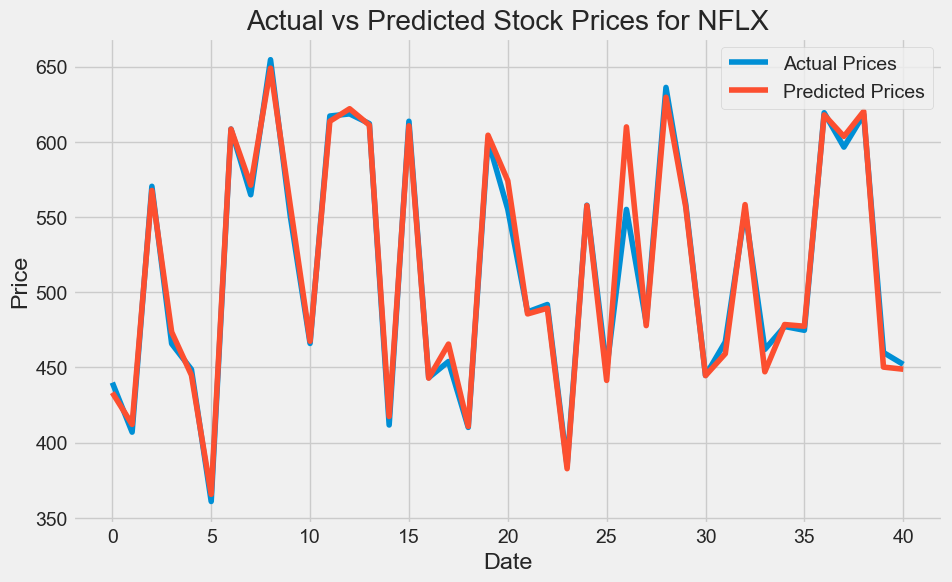

META:
Mean Squared Error: 73.0949546393748
Mean Absolute Error: 4.409037919228732

AAPL:
Mean Squared Error: 1.0968229504555969
Mean Absolute Error: 0.7266481957246425

NVDA:
Mean Squared Error: 283.5288200224573
Mean Absolute Error: 9.342451907546923

NFLX:
Mean Squared Error: 108.91117071554243
Mean Absolute Error: 5.752782404856094



In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Custom function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Custom function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - signal_line
    return macd, signal_line, macd_hist

# Custom function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()
    return obv

# Function to prepare data with additional features
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock['RSI'] = calculate_rsi(stock['Adj Close'])
    stock['MACD'], stock['MACD_Signal'], stock['MACD_Hist'] = calculate_macd(stock['Adj Close'])
    stock['OBV'] = calculate_obv(stock)
    
    # Adding Bollinger Bands
    stock['20_day_std'] = stock['Adj Close'].rolling(window=20).std()
    stock['Upper_Band'] = stock['20_day_MA'] + (stock['20_day_std'] * 2)
    stock['Lower_Band'] = stock['20_day_MA'] - (stock['20_day_std'] * 2)
    
    # Lag features
    stock['Lag_1'] = stock['Adj Close'].shift(1)
    stock['Lag_2'] = stock['Adj Close'].shift(2)
    
    stock.dropna(inplace=True)
    return stock

# Train and evaluate model for each stock
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    stock = prepare_data(ticker)
    
    # Feature selection
    features = ['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 
                'Upper_Band', 'Lower_Band', 'Lag_1', 'Lag_2', 'OBV']
    X = stock[features]
    y = stock['Adj Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training with hyperparameter tuning
    gbr = GradientBoostingRegressor()
    param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_gbr = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_gbr.predict(X_test_scaled)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[ticker] = {'mse': mse, 'mae': mae, 'y_test': y_test, 'y_pred': y_pred}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Stock Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Display results
for ticker, result in results.items():
    print(f"{ticker}:")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print()

[*********************100%%**********************]  1 of 1 completed

Processing META...



[*********************100%%**********************]  1 of 1 completed

META:
Mean Squared Error: 51.96913393722696
Mean Absolute Error: 4.891407625582708

Processing AAPL...



[*********************100%%**********************]  1 of 1 completed

AAPL:
Mean Squared Error: 11.880072865328799
Mean Absolute Error: 2.651919873190455

Processing NVDA...



[*********************100%%**********************]  1 of 1 completed

NVDA:
Mean Squared Error: 561.9708017720646
Mean Absolute Error: 15.392059045649653

Processing NFLX...


NFLX:
Mean Squared Error: 192.7201903391627
Mean Absolute Error: 9.34184438684127

The best model is for NFLX with MSE: 192.7201903391627


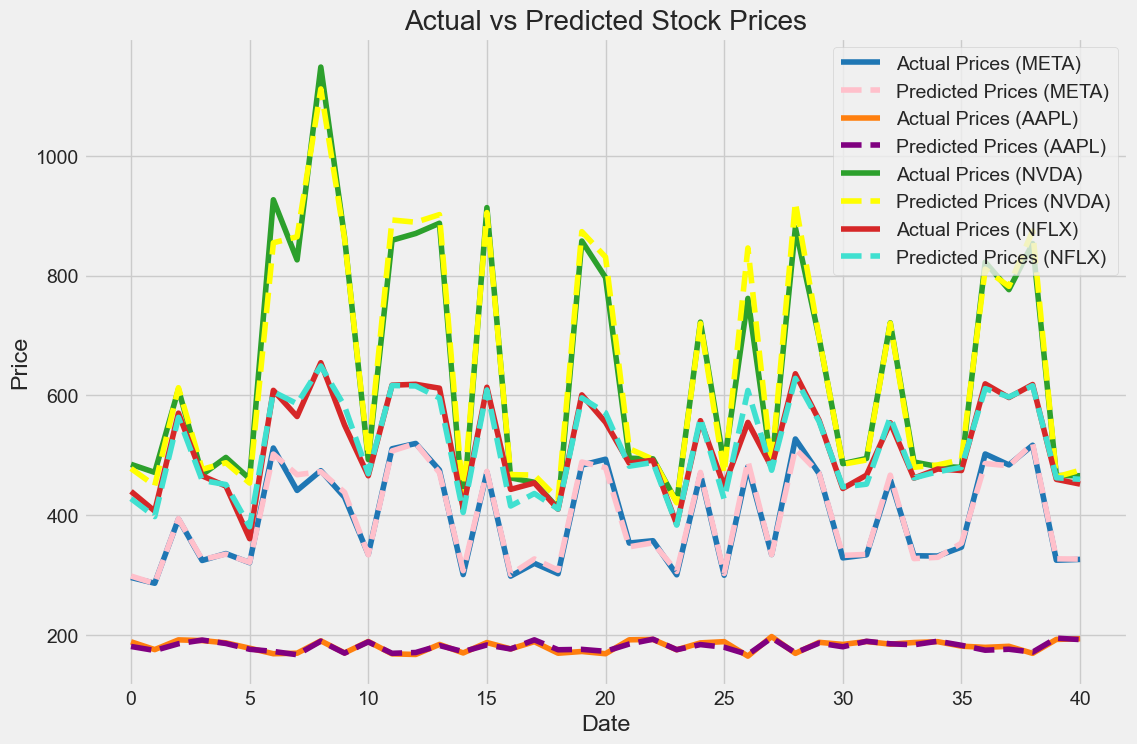

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

# Define the start and end date for data download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Define the list of tech stocks
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Function to prepare data
def prepare_data(ticker):
    stock = yf.download(ticker, start=start, end=end)
    stock['10_day_MA'] = stock['Adj Close'].rolling(window=10).mean()
    stock['20_day_MA'] = stock['Adj Close'].rolling(window=20).mean()
    stock['50_day_MA'] = stock['Adj Close'].rolling(window=50).mean()
    stock['Daily_Return'] = stock['Adj Close'].pct_change()
    stock.dropna(inplace=True)
    X = stock[['10_day_MA', '20_day_MA', '50_day_MA', 'Daily_Return']]
    y = stock['Adj Close']
    return X, y

# Train and evaluate model for each stock
best_models = {}
results = {}
for ticker in tech_list:
    print(f"Processing {ticker}...")
    X, y = prepare_data(ticker)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the model
    gbr = GradientBoostingRegressor()
    
    # Define the hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
    
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    best_models[ticker] = best_model
    
    # Save the best model
    joblib.dump(best_model, f"{ticker}_model.pkl")
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{ticker}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

    # Store results
    results[ticker] = {"y_test": y_test, "y_pred": y_pred}

# Select the best model based on MSE
best_ticker, best_model = min(best_models.items(), key=lambda x: mean_squared_error(x[1].predict(X_test_scaled), y_test))

print(f"The best model is for {best_ticker} with MSE: {mean_squared_error(best_model.predict(X_test_scaled), y_test)}")

# Plot actual vs predicted for all stocks
plt.figure(figsize=(12, 8))
actual_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
predicted_colors = ['pink', 'purple', 'yellow', 'turquoise']
for i, (ticker, result) in enumerate(results.items()):
    actual_color = actual_colors[i] if i < len(actual_colors) else actual_colors[i % len(actual_colors)]  # Cycle through the color list
    predicted_color = predicted_colors[i] if i < len(predicted_colors) else predicted_colors[i % len(predicted_colors)]  # Cycle through the color list
    plt.plot(result['y_test'].values, label=f'Actual Prices ({ticker})', color=actual_color)
    plt.plot(result['y_pred'], label=f'Predicted Prices ({ticker})', linestyle='--', color=predicted_color)
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()